<a href="https://colab.research.google.com/github/Sans-dubey/Bike_Sharing_demand_Prediction_Sanskar/blob/main/Bike_Sharing_Demand_Prediction_Sanskar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Sanskar Dubey

# **Project Summary -**

#### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

#### Given the problem statement,I have been provided with two datasets, containing essential features such as Date, Rented Bike counts, hour, Temperature, Rainfall, Snowfall, Seasons, and more.So, First I have explore and analyse the data where I have done Data cleaning,remove duplicates and outliers then feature engineering to create relevant predictors for the predictive model.

#### My primary objective is to develop a predictive model capable of forecasting the number of bikes needed for users in each hour. This model will leverage the historical data and incorporate various factors such as time of day, weather conditions, and seasonal variations to accurately predict bike demand patterns.

#### The successful implementation of the predictive model will enable rental bike services to make bikes readily available and accessible to the public when they need them most. As a result, waiting times will be reduced, leading to enhanced mobility comfort for urban residents. Moreover, this predictive approach will encourage more individuals to adopt sustainable transportation options, contributing to a greener and more efficient urban environment.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


#### The introduction of rental bikes in urban cities has aimed to enhance mobility comfort and offer the public an efficient means of transportation. Ensuring the availability of rental bikes at the right time is crucial to minimize waiting times for users and optimize their experience. However, providing a stable supply of rental bikes becomes a significant concern. To address this challenge, the key lies in accurately predicting the bike count required at each hour.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [354]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

### Dataset Loading

In [355]:
# Load Dataset

In [356]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
bike_df = pd.read_csv('/content/drive/MyDrive/CSV files/SeoulBikeData.csv',encoding = 'unicode_escape')

### Dataset First View

In [358]:
# Dataset First Look

bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [359]:
# Dataset Rows & Columns count

bike_df.shape

(8760, 14)

### Dataset Information

In [360]:
# Dataset Info

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [361]:
# Dataset Duplicate Value Count

duplicated_count = bike_df.duplicated().sum()
duplicated_count

0

#### --> Dataset doesn't contain any duplicate values

#### Missing Values/Null Values

In [362]:
# Missing Values/Null Values Count

missing_values_count = bike_df.isnull().sum()
missing_values_count

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### --> There are no null values in the Dataset

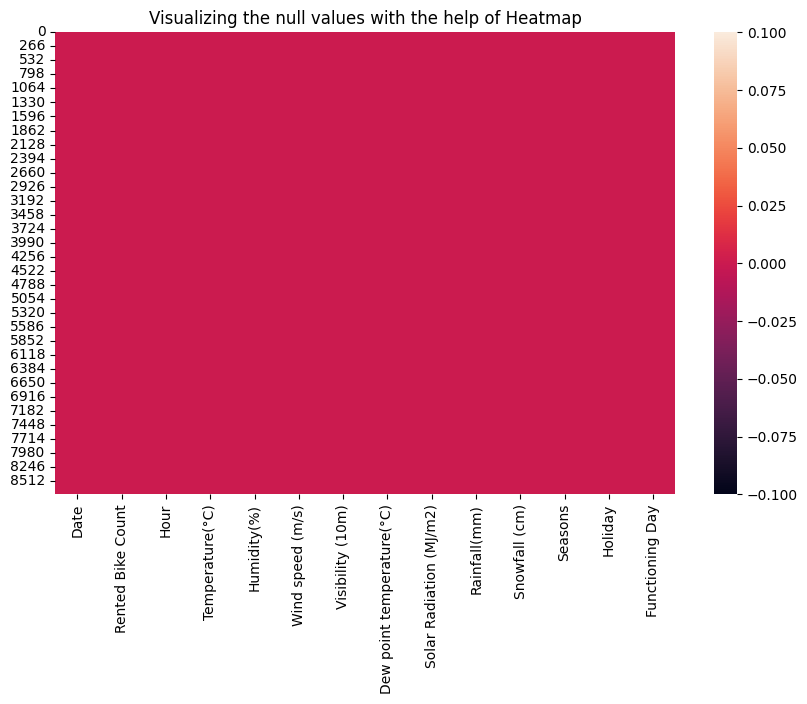

In [363]:
# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.heatmap(bike_df.isnull())
plt.title('Visualizing the null values with the help of Heatmap')
plt.show()

### What did you know about your dataset?

###--> Dataset consists 8,760 data points across 14 columns with no null values or duplicated records.

## ***2. Understanding Your Variables***

In [364]:
# Dataset Columns

bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [365]:
# Dataset Describe

bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [366]:
# Numerical Columns

Numerical_columns = bike_df.describe().columns
Numerical_columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [367]:
# Categorical Columns

Categorical_columns = bike_df.select_dtypes(include=['object','category']).columns
Categorical_columns

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

### Variables Description

### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day(0-23)
* ### Temperature-Temperature in Celsius
* ### Humidity - Humidity Measure (%)
* ### Windspeed - Windspeed(m/s)
* ### Visibility - Visibility measure(10m)
* ### Dew point temperature - Dew point temperature Measure(Celsius)
* ### Solar radiation - Solar Radiation Measure(MJ/m2)
* ### Rainfall - Rainfall in mm
* ### Snowfall - Snowfall in cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### --> There are 10 numerical, 3 categorical and 1 Datetime column in the Dataset.

### --> Numerical Columns - : [ 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

### --> Categorical Columns -: ['Seasons', 'Holiday', 'Functioning Day']

### --> Datetime Column -: ['Date']

### --> Descriptive summary of the dataset looks overall good some feature may contain outliers.



### Check Unique Values for each variable.

In [368]:
# Check Unique Values for each variable.

bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### 1. Data Wrangling Code

In [369]:
# Write your code to make your dataset analysis ready.

In [370]:
# Importing Datetime Modules

from datetime import datetime
from datetime import date

In [371]:
# Converting the data type of Date column from Object to Datetime

bike_df['Date'] = pd.to_datetime(bike_df['Date'])


Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


In [372]:
# Convering the Date Column in three different Categories

bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day_name()

In [373]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [374]:
# Creating a function whick will check whether the day is Weekday or Weekend

def check_day(day):
  if day in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
    return 'Weekday'
  else:
    return 'Weekend'

In [375]:
# Appying the above function to check

check_day('Saturday')

'Weekend'

In [376]:
# Creating the new column week and applying the above created function

bike_df['Week'] = bike_df.apply(lambda x: check_day(x['Day']),axis=1)

In [377]:
bike_df.head(2)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year  Month       Day     Week  
0             Yes  2017      1  Thursday  Weekday  
1             Yes  2017      1  Thursday  Weekday

In [378]:
 # Creating this dummy dataframe to create visualisation on temperature with outliers

bike_df_col_list = list(set(bike_df.describe().columns)-{'Hour','Year','Month'})

In [379]:
bike_sharing_df = bike_df[bike_df_col_list]

In [380]:
bike_sharing_df.head(1)

Rented Bike Count  Visibility (10m)  Humidity(%)  Wind speed (m/s)  \
0                254              2000           37               2.2   

   Snowfall (cm)  Solar Radiation (MJ/m2)  Dew point temperature(°C)  \
0            0.0                      0.0                      -17.6   

   Temperature(°C)  Rainfall(mm)  
0             -5.2           0.0

### 2. Handling Outliers

#### Outliers are data points that deviate significantly from the majority of other data points in a dataset. These data points lie far away from the central tendency of the data, either on the higher or lower end of the value range

In [381]:
# Checking the Outliers in the dataset

In [382]:
# Creating the list Columns which may contain outliers

possible_outlier_columns = list(set(bike_df.describe().columns)-{'Rented Bike Count','Hour','Year','Month'})
possible_outlier_columns

['Visibility (10m)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Dew point temperature(°C)',
 'Temperature(°C)',
 'Rainfall(mm)']

In [383]:
# Creating a box plot to detect the Outliers

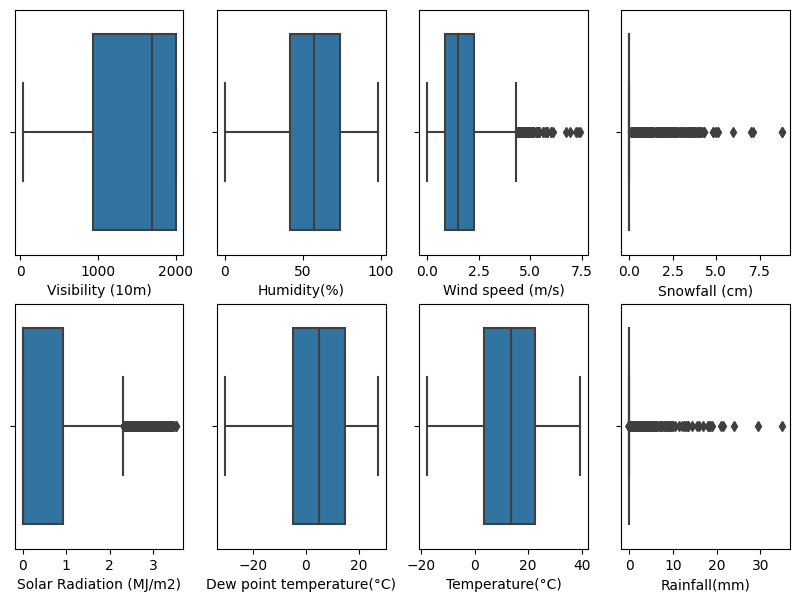

In [384]:
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_columns):
  plt.subplot(2,4,index+1)
  #bike_df[item].plot(kind='box')
  sns.boxplot(x=bike_df[item], data=bike_df)



### --> We can see from  the above boxplot that column Snowfall, Solar Radiation, Rainfall and Wind Speed contain outliers.

## Removing Outliers

In [385]:
# Creating a list of Columns that contain Outliers

Col_with_outliers = ['Snowfall (cm)','Solar Radiation (MJ/m2)','Rainfall(mm)','Wind speed (m/s)']
Col_with_outliers


['Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Wind speed (m/s)']

### We will use the IQR method to remove these outlies
### IQR = Q3-Q1
### Upper Whisker -: (Q3 + 1.5 * IQR) - After the fence of Upper Whisker values are very extreme
### Lower Whisker -: (Q1 - 1.5 * IQR) - After the fence of Lower Whisker values are very low

In [386]:
# Finding the Interquartile Range to remove these Outliers

Q1 = bike_df[Col_with_outliers].quantile(0.25)
Q3 = bike_df[Col_with_outliers].quantile(0.75)
IQR = Q3-Q1
IQR

Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
Rainfall(mm)               0.00
Wind speed (m/s)           1.40
dtype: float64

In [387]:
# Calculating the Upperside and Lowerside Outlier

Upper_Whisker = Q3 + (1.5*IQR)
Lower_Whisker = Q1 - (1.5*IQR)

In [388]:
Upper_Whisker

Snowfall (cm)              0.000
Solar Radiation (MJ/m2)    2.325
Rainfall(mm)               0.000
Wind speed (m/s)           4.400
dtype: float64

In [389]:
Lower_Whisker

Snowfall (cm)              0.000
Solar Radiation (MJ/m2)   -1.395
Rainfall(mm)               0.000
Wind speed (m/s)          -1.200
dtype: float64

In [390]:
# Filtering or Subsetting the outliers from the dataframe

bike_df[Col_with_outliers] = bike_df[Col_with_outliers][~((bike_df[Col_with_outliers] < Lower_Whisker) | (bike_df[Col_with_outliers] > Upper_Whisker))]

In [391]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8599 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8119 non-null   float64       
 9   Rainfall(mm)               8232 non-null   float64       
 10  Snowfall (cm)              8317 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### 3. Handling Missing Values

In [392]:
# Replacing the null values with the help of median

bike_df['Wind speed (m/s)'].fillna(bike_df['Wind speed (m/s)'].median(),inplace=True)
bike_df['Solar Radiation (MJ/m2)'].fillna(bike_df['Solar Radiation (MJ/m2)'].median(),inplace=True)
bike_df['Rainfall(mm)'].fillna(bike_df['Rainfall(mm)'].median(),inplace=True)
bike_df['Snowfall (cm)'].fillna(bike_df['Snowfall (cm)'].median(),inplace=True)



In [393]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### What all manipulations have you done and insights you found?


*   Converted the "Date" column from object data type to datetime data type to facilitate time-based operations and analysis.

*   Categorized the "Date" column into three distinct categories: "Weekday," "Saturday," and "Sunday" based on the day of the week.
*   Utilized the datetime information to determine whether each date falls on a weekday (Monday to Friday), Saturday, or Sunday.


*   Employed box plots to visualize the distribution of numerical variables and identify potential outliers.

*   Applied the Interquartile Range (IQR) method to detect and remove outliers from the dataset.
*   Removed data points lying beyond these bounds to ensure a cleaner and more robust dataset.
*   As a result of removing outliers, some data points may have been removed, leading to null or missing values in the dataset.
*   Imputed these null values using the median of the respective feature.
*   By following these steps efficiently, the dataset has been prepared for further analysis and modeling.









## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [394]:
#  Total number of bikes rented across different hours of the day

Bike_rent_diff_hours = bike_df.groupby('Hour').agg({'Rented Bike Count':'sum'}).reset_index()
Bike_rent_diff_hours.head()


Hour  Rented Bike Count
0     0             197633
1     1             155557
2     2             110095
3     3              74216
4     4              48396

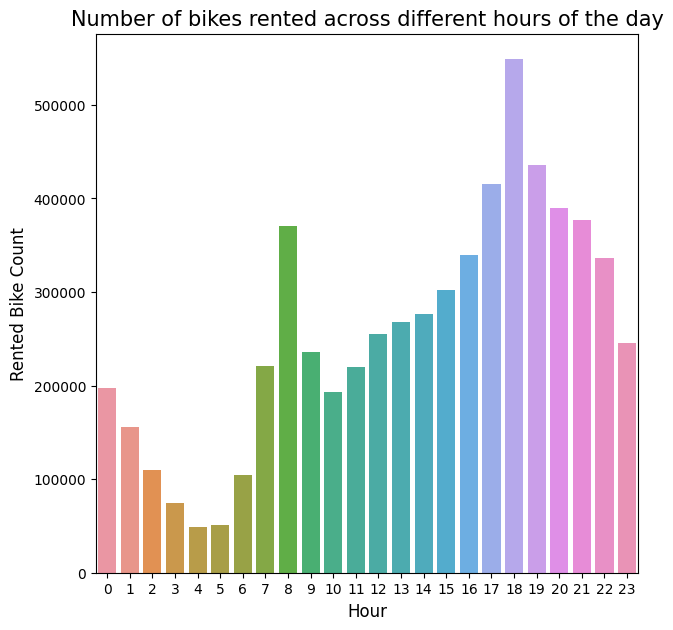

In [395]:
# Chart - 1 visualization code
plt.figure(figsize=(7,7))
sns.barplot(data=Bike_rent_diff_hours,x='Hour',y='Rented Bike Count')
plt.title('Number of bikes rented across different hours of the day',size=15)
plt.xlabel('Hour',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand the varying levels of demand and identify peak hours when bike rentals are at their highest.


##### 2. What is/are the insight(s) found from the chart?

#### We can see from the above bar plot that highest number of Bike rented in the evening time at 18:00 i.e 6:00 PM or in the moring time at 8:00-9:00 which is essentially office time

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the insight that I get from the above bar chart help in creating a positive business impact.

#### Chart - 2

In [396]:
# Total Number of bike rented across different seasons

Bike_rent_diff_seasons = bike_df.groupby('Seasons').agg({'Rented Bike Count':'sum'}).reset_index()
Bike_rent_diff_seasons.head()

Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

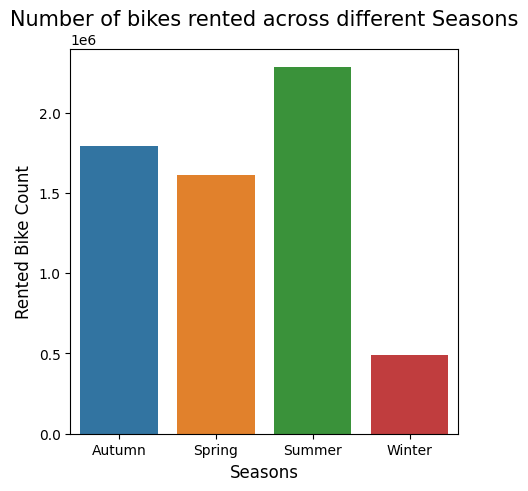

In [397]:
# Chart - 2 visualization code

plt.figure(figsize=(5,5))
sns.barplot(data=Bike_rent_diff_seasons,x='Seasons',y='Rented Bike Count')
plt.title('Number of bikes rented across different Seasons',size=15)
plt.xlabel('Seasons',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand the seasons during which bike rentals are at their peak and those in which they might experience a decline.

##### 2. What is/are the insight(s) found from the chart?

#### The bar plot clearly illustrates the seasonal variations in bike rentals, showcasing that the summer season experiences the highest bike rental activity, while the winter season sees the lowest usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insight will help in creating a positive business impact.

#### Chart - 3

In [398]:
# Percentage distribution of rented bike across different seaesons

In [399]:
# Prepration For Pie chart

seasons_list = list(Bike_rent_diff_seasons['Seasons'])
rented_count_list = list(Bike_rent_diff_seasons['Rented Bike Count'])

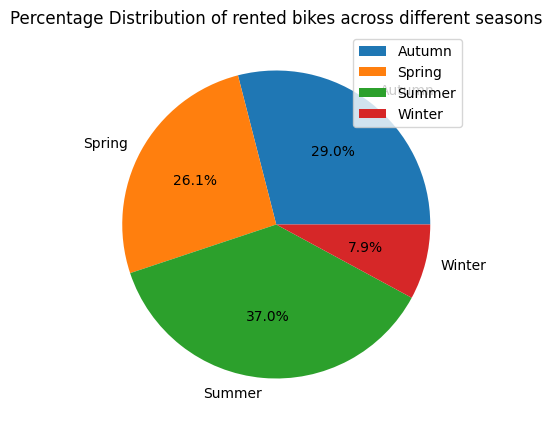

In [400]:
# Chart - 3 visualization code

plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels =seasons_list,autopct='%1.1f%%' )
plt.title('Percentage Distribution of rented bikes across different seasons')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

#### I have picked the specific pie chart to undrstand which season attracts the highest percentage of bike rentals and which season sees the lowest percentage.

##### 2. What is/are the insight(s) found from the chart?

#### The pie chart cleary illustrate that summer season has the highest percentage of bike rentals while winter seasons has the lowest percentage of bike rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, the gained insight help in creating a positive business impact.

#### Chart - 4

In [401]:
# Total number of bike rented across holiday and holidays
Bike_rented_diff_holidays = bike_df.groupby('Holiday').agg({'Rented Bike Count':'sum'}).reset_index()
Bike_rented_diff_holidays

Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419

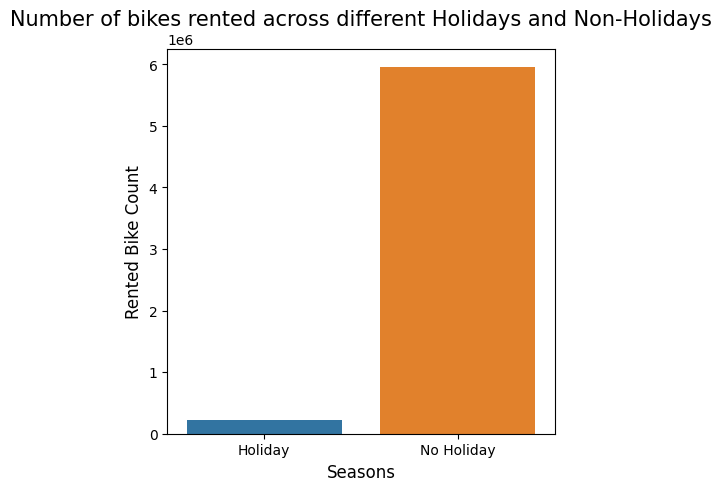

In [402]:
# Chart - 4 visualization code

plt.figure(figsize=(5,5))
sns.barplot(data=Bike_rented_diff_holidays,x='Holiday',y='Rented Bike Count')
plt.title('Number of bikes rented across different Holidays and Non-Holidays',size=15)
plt.xlabel('Seasons',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()


##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to compare the bike rental data on holidays to that on regular days, we can understand the impact of holidays on rental bike demand.

##### 2. What is/are the insight(s) found from the chart?

### The above bar chart illustrate that the majority of the bikes are rented on non-holiday or regular days. It suggests that rental bikes are being utilized more frequently for everyday transportation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes the gained insights help in creating positive business impact.

#### Chart - 5

In [403]:
# Total no of bike Rented across different months

Bike_rented_diff_mnths = bike_df.groupby('Month').agg({'Rented Bike Count':'sum'}).sort_values(['Month'],ascending=True).reset_index()
Bike_rented_diff_mnths


Month  Rented Bike Count
0       1             287244
1       2             264112
2       3             455037
3       4             556219
4       5             665948
5       6             706728
6       7             691339
7       8             614190
8       9             499326
9      10             626988
10     11             493412
11     12             311771

In [404]:
Month_list_2 = list(Bike_rented_diff_mnths['Month'])
rented_count_list = list(Bike_rented_diff_mnths['Rented Bike Count'])

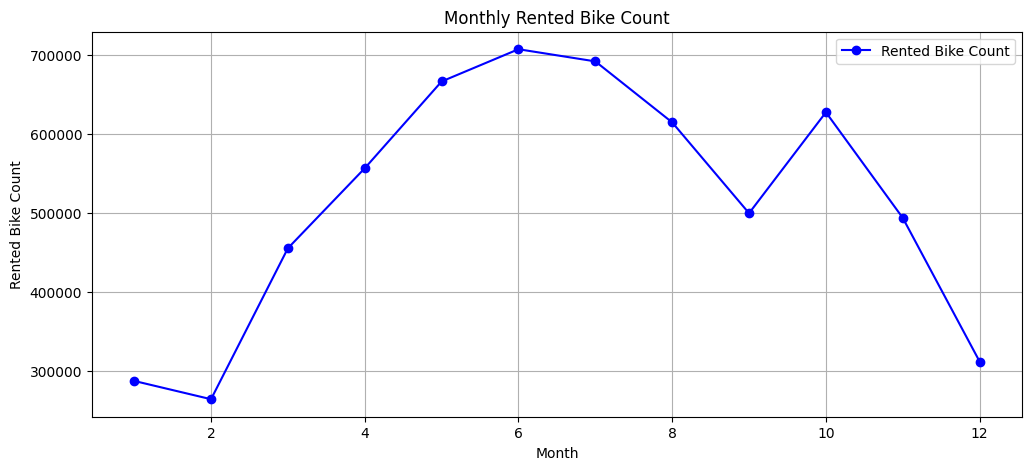

In [405]:
# Chart - 5 visualization code

plt.figure(figsize=(12, 5))
plt.plot(Month_list_2, rented_count_list, marker='o', linestyle='-', color='b', label='Rented Bike Count')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Monthly Rented Bike Count')

# Show gridlines (optional)
plt.grid(True)

plt.legend()

plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific line chart to understand seasonal variations in bike rental demand throughout the year.

##### 2. What is/are the insight(s) found from the chart?

#### We can clearly illustrate from the above line chart that most bikes rented between April to August while decrease in December, January and Feburary.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes the gained insights help in creating positive business impact.

#### Chart - 6

In [406]:
# Total number of bike rented across weekend vs weekdays

Bike_rented_diff_week = bike_df.groupby('Week').agg({'Rented Bike Count':'sum'}).reset_index()
Bike_rented_diff_week

Week  Rented Bike Count
0  Weekday            4462544
1  Weekend            1709770

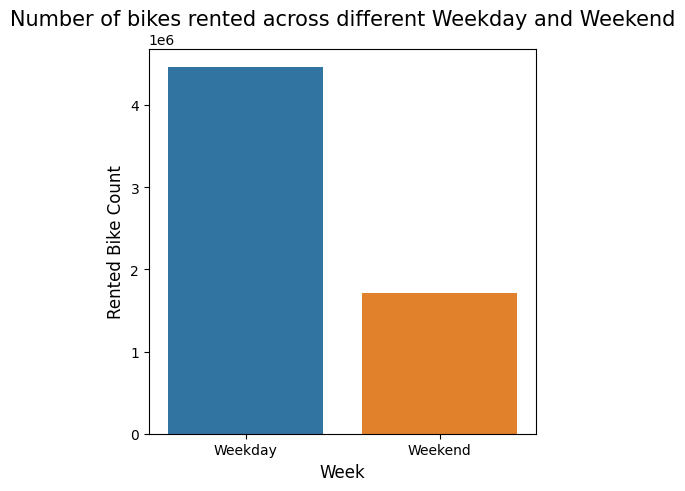

In [407]:
# Chart - 6 visualization code
plt.figure(figsize=(5,5))
sns.barplot(data=Bike_rented_diff_week,x='Week',y='Rented Bike Count')
plt.title('Number of bikes rented across different Weekday and Weekend',size=15)
plt.xlabel('Week',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()


##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to compare the bike rental data on Weekday to that on Weekend, we can understand the impact of weekend on rental bike demand.

##### 2. What is/are the insight(s) found from the chart?

#### The above bar chart illustrate that the majority of the bikes are rented on Weekday or regular days. It suggests that rental bikes are being utilized more frequently for everyday transportation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes the gained insights help in creating positive business impact.

#### Chart - 7

In [408]:
# Creating a Scatter plot to understanding the Relationship between Temperature and Rented Bike Count

Rented_temp_bikes = bike_df.groupby('Temperature(°C)').agg({'Rented Bike Count':'sum'}).reset_index()
Rented_temp_bikes.head()

Temperature(°C)  Rented Bike Count
0            -17.8                322
1            -17.5                291
2            -17.4                 64
3            -16.9                 36
4            -16.5                 96

In [409]:
Temp = list(Rented_temp_bikes['Temperature(°C)'])
Rented_bike = list(Rented_temp_bikes['Rented Bike Count'])

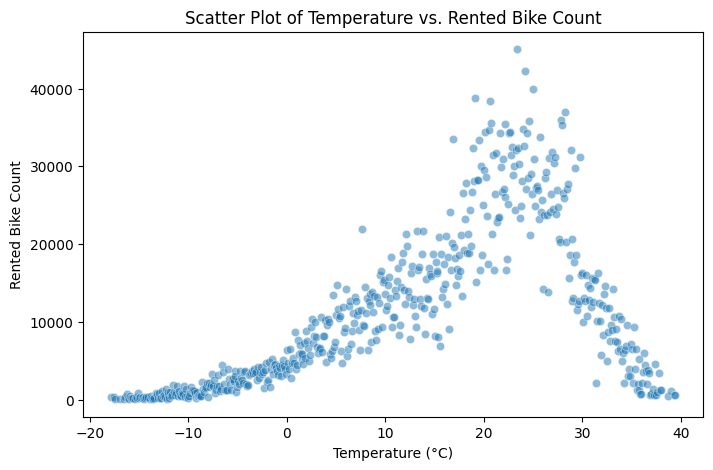

In [410]:
# Chart - 7 visualization code

plt.figure(figsize=(8,5))
sns.scatterplot(x=Temp, y=Rented_bike,alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot of Temperature vs. Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

### I have picked the specific chart to understand the relationship between Temperature and Rented Bike Count.

##### 2. What is/are the insight(s) found from the chart?

### We can clearly illustrate that as the temperature increases Rented bike count also increases and the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes, Gained insights help creating a positive business impact.

#### Chart - 8

In [411]:

# Creating a Scatter plot to understanding the Relationship between Temperature and Rented Bike Count

Rainfall_bike = bike_sharing_df.groupby('Rainfall(mm)').agg({'Rented Bike Count':'sum'}).reset_index()
Rainfall_bike.head()

Rainfall(mm)  Rented Bike Count
0           0.0            6086009
1           0.1              15179
2           0.2               3706
3           0.3               1401
4           0.4               2147

In [412]:
Rainfall = list(Rainfall_bike['Rainfall(mm)'])
Rented_bike_count = list(Rainfall_bike['Rented Bike Count'])

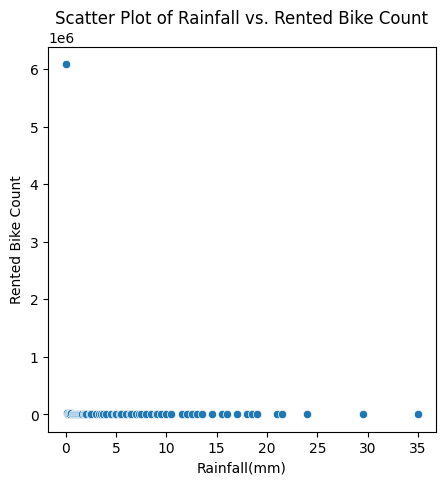

In [413]:
# Chart - 8 visualization code

plt.figure(figsize=(5,5))
sns.scatterplot(x=Rainfall, y=Rented_bike_count)
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot of Rainfall vs. Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

#### I have used the specific chart to understand the relationship between Rainfall and Rented Bike count.

##### 2. What is/are the insight(s) found from the chart?

#### With the help of these scatter plot we can clearly illustrate most of the bikes are rented when there is no rainfall which implies that as the rainfall increases Bike rental fastly decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### No, the gained insights doesn't help creating a positive business impact.

#### Chart - 9

In [414]:
# Chart - 9 visualization code

Snowfall_bike = bike_sharing_df.groupby('Snowfall (cm)').agg({'Rented Bike Count':'sum'}).reset_index()
Snowfall_bike.head()

Snowfall (cm)  Rented Bike Count
0            0.0            6090314
1            0.1                205
2            0.2               3643
3            0.3               8304
4            0.4               5981

In [415]:
Snowfall = list(Snowfall_bike['Snowfall (cm)'])
Rented_bike_count_s = list(Snowfall_bike['Rented Bike Count'])

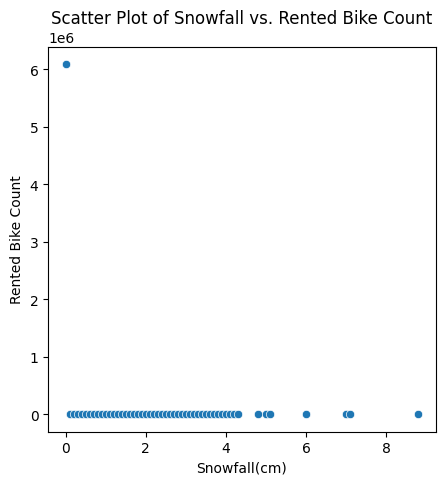

In [416]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=Snowfall, y=Rented_bike_count_s)
plt.xlabel('Snowfall(cm)')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot of Snowfall vs. Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

#### I have used the specific chart to understand the relationship between Rainfall and Rented Bike count.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

#### From the above scatter plot we can clearly illustrate most of the bikes are rented when there is no snowfall at all which implies that as the rainfall increases Bike rental fastly decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### No, the gained insights doesn't help creating a positive business impact.

#### Chart - 10

In [417]:
Rented_temp_bike_1 = bike_df.groupby(['Seasons','Temperature(°C)']).agg({'Rented Bike Count':'sum'}).reset_index()
Rented_temp_bike_1.head()

Seasons  Temperature(°C)  Rented Bike Count
0  Autumn             -3.0               1516
1  Autumn             -2.8                727
2  Autumn             -2.6                339
3  Autumn             -2.4                129
4  Autumn             -2.0                109

In [418]:
Temp_1 = list(Rented_temp_bike_1['Temperature(°C)'])
Rented_bike_1 = list(Rented_temp_bike_1['Rented Bike Count'])

In [419]:
Season_1 = Rented_temp_bike_1['Seasons'].tolist()

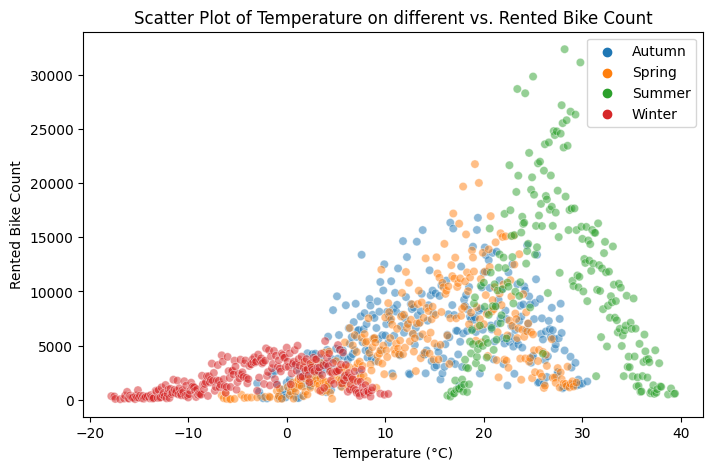

In [420]:
# Chart - 10 visualization code

plt.figure(figsize=(8,5))
sns.scatterplot(x=Temp_1, y=Rented_bike_1,alpha=0.5,hue=Season_1)
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot of Temperature on different vs. Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand the relationship between Temperature and Rental bike across different seasons.

##### 2. What is/are the insight(s) found from the chart?

### We can clearly illustrate from the above Scatter plot during the winter season when the temperature is slightly decreases during winter seasons we can see decrease in Rental bike while when temperature is between 10 to 30 the maximum number of bike is rented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Yes the gained insight helped in creating a positive business impact.

#### Chart - 11

In [421]:

# Total Number of bike rented across different days in different hours

Bike_rented_diff_hour_holiday= bike_df.groupby(['Hour','Day']).agg({'Rented Bike Count':'sum'}).sort_values(['Hour'],ascending=True).unstack()
Bike_rented_diff_hour_holiday.head(2)



Rented Bike Count                                                  
Day             Friday Monday Saturday Sunday Thursday Tuesday Wednesday
Hour                                                                    
0                28395  22267    33421  29657    29942   28834     25117
1                22298  15522    28965  22375    24354   22325     19718

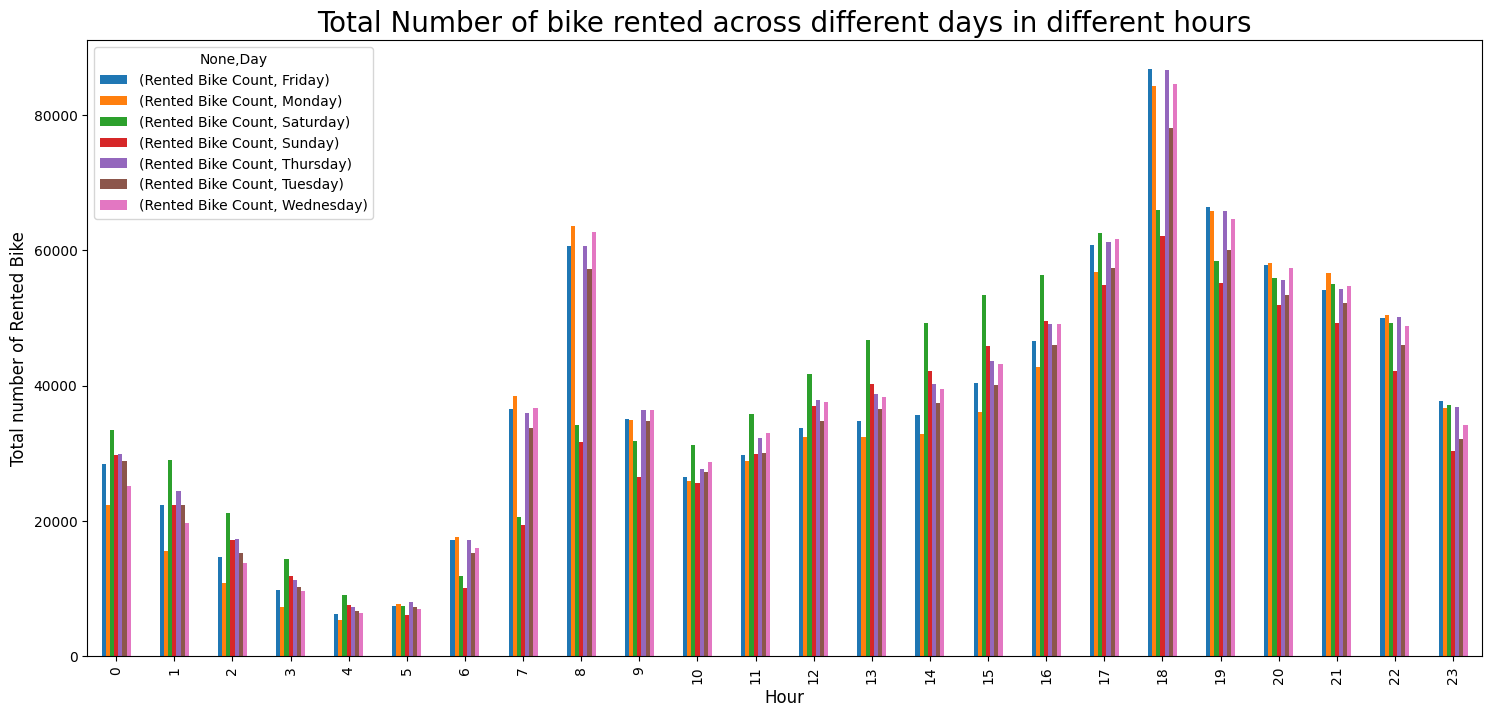

In [422]:
# Chart - 11 visualization code

Bike_rented_diff_hour_holiday.plot(kind='bar',figsize=(18,8),fontsize =10)

plt.title('Total Number of bike rented across different days in different hours',fontsize = 20)
plt.ylabel('Total number of Rented Bike',fontsize = 12)
plt.xlabel('Hour',fontsize = 12)
plt.show()


##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand how the total number of bikes rented changes from hour to hour within each day of the week.

##### 2. What is/are the insight(s) found from the chart?

#### The chart clearly illustrates the demand for rental bikes during specific hours from Monday to Friday. At 8:00 AM and 6:00 PM, there is a significant peak in rental bike usage, indicating that these hours experience the highest demand on weekdays.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes the gained insights help in creating postive business impact, The surge in demand at 8:00 AM suggests that many people are using rental bikes for their morning commutes, likely to travel to work or school.

#### Chart - 12

In [423]:
bike_df.head(2)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year  Month       Day     Week  
0             Yes  2017      1  Thursday  Weekday  
1             Yes  2017      1  Thursday  Weekday

In [424]:
# Total no of bike Rented across different humidity(%)

Bike_rented_diff_humidity = bike_df.groupby('Humidity(%)').agg({'Rented Bike Count':'sum'}).reset_index()
Bike_rented_diff_humidity.head(2)

Humidity(%)  Rented Bike Count
0            0               6930
1           10               1315

In [425]:
# Chart - 12 visualization code

humidity = list(Bike_rented_diff_humidity['Humidity(%)'])
Rented_bike_counts = list(Bike_rented_diff_humidity['Rented Bike Count'])



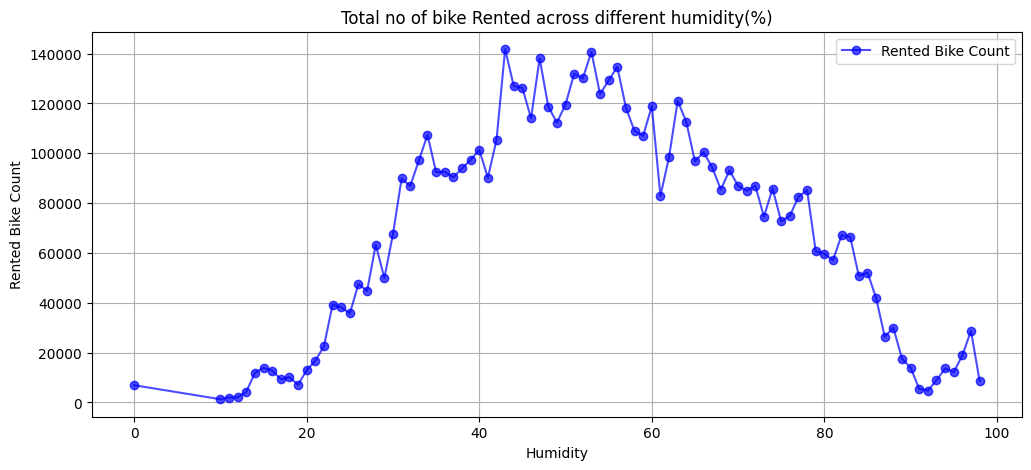

In [426]:
plt.figure(figsize=(12, 5))
plt.plot(humidity, Rented_bike_counts, marker='o', linestyle='-', color='b', label='Rented Bike Count',alpha=0.7)

# Add labels and title
plt.xlabel('Humidity')
plt.ylabel('Rented Bike Count')
plt.title('Total no of bike Rented across different humidity(%)')

# Show gridlines (optional)
plt.grid(True)

plt.legend()

plt.show()

##### 1. Why did you pick the specific chart?

#### I have picked the specific chart to understand what are the total no of bike Rented across different humidity(%)

##### 2. What is/are the insight(s) found from the chart?

####  we can see from the above line chart that the majority of the bikes are rented for a humidity percentage range of 30 to 70.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes the gained chart help in creating a positive business impact.

#### Chart - 13

In [427]:
# Creating a Scatter plot to understanding the Relationship between Temperature and Rented Bike Count

Bike_rented_diff_Visibility = bike_df.groupby('Visibility (10m)').agg({'Rented Bike Count':'sum'}).reset_index()
Bike_rented_diff_Visibility.head(2)

Visibility (10m)  Rented Bike Count
0                27                 83
1                33                 33

In [428]:
# Chart - 13 visualization code

Visibility = list(Bike_rented_diff_Visibility['Visibility (10m)'])
bike_rented_count = list(Bike_rented_diff_Visibility['Rented Bike Count'])

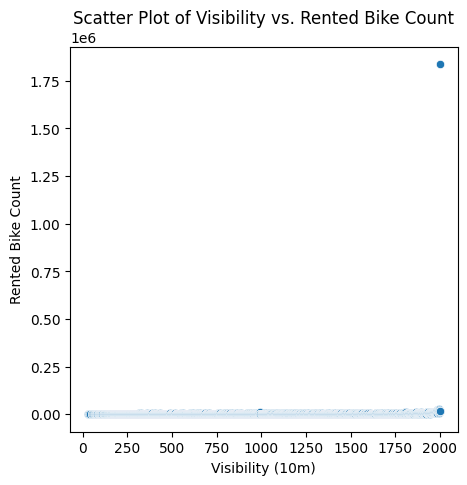

In [429]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=Visibility, y=bike_rented_count )
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.title('Scatter Plot of Visibility vs. Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

#### I have used the specific chart to understand the relationship between Visibility and Rented Bike count.

##### 2. What is/are the insight(s) found from the chart?

#### From the above scatter plot we can clearly illustrate most of the bikes are rented when there is high Visibility which implies that as the Visibility increases Bike rental increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

#### Categorical encoding is a process in data preprocessing that transforms categorical data into numerical representations so that machine learning algorithms can work with them more effectively.

In [430]:
# Encode your categorical columns

bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Year  Month       Day     Week  
0             Yes  2017      1  Thursday  Weekday  
1             Yes  2017      1  Thursday  Weekday  
2             Yes  2017      1  Thursday  Weekday  
3             Yes  2017      1  Thursday  Weekday  
4             Yes  2017      1  Thursday  Weekday

In [431]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [432]:
# Creating dummies for this column Seasons and storing in the new dataframe

Season_df = pd.get_dummies(bike_df['Seasons'])

In [433]:
Season_df.head(4)

Autumn  Spring  Summer  Winter
0       0       0       0       1
1       0       0       0       1
2       0       0       0       1
3       0       0       0       1

In [434]:
# Merging the two dataframe

bike_demand_df = pd.concat([bike_df,Season_df],axis=1)

In [435]:
bike_demand_df.head(4)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  ...     Holiday Functioning Day  \
0                      0.0           0.0  ...  No Holiday             Yes   
1                      0.0           0.0  ...  No Holiday             Yes   
2                      0.0           0.0  ...  No Holiday             Yes   
3                      0.0           0.0  ...  No Holiday             Yes   

   Year Month       Day     Week Autumn Spring  Summer  Winter  
0  2017     1  Thursday  Weekday      0      0       0       1  
1  2017     1  Thursday  Weekday      0      0       0       1  
2  2017     1  Thursday  Weekday      0      0       0       1  
3  2017     1  Thursday  Weekday      0      0       0       1  

[4 rows x 22 columns]

In [436]:
# Dropping this column Seasons because we have already created dummies for it

bike_demand_df.drop('Seasons',axis=1,inplace=True)

In [437]:
# Creating dummies for Another column Day

dow_df= pd.get_dummies(bike_df['Day'])

In [438]:
dow_df.head(3)

Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0       0         0       0         1        0          0
1       0       0         0       0         1        0          0
2       0       0         0       0         1        0          0

In [439]:
# Merge the two dataframe to create a new datframe

bike_share_demand_df = pd.concat([bike_demand_df,dow_df],axis=1)

In [440]:
bike_share_demand_df.head(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  ...  Spring Summer Winter  Friday  \
0                      0.0           0.0  ...       0      0      1       0   
1                      0.0           0.0  ...       0      0      1       0   
2                      0.0           0.0  ...       0      0      1       0   

   Monday Saturday Sunday  Thursday  Tuesday  Wednesday  
0       0        0      0         1        0          0  
1       0        0      0         1        0          0  
2       0        0      0         1        0          0  

[3 rows x 28 columns]

In [441]:
# Dropping the unnecessary columns from the dataframe

bike_share_demand_df.drop(['Date','Year','Day'],axis=1,inplace=True)

In [442]:
bike_share_demand_df.head(1)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  ... Spring Summer  Winter Friday  Monday  \
0           0.0            0.0  ...      0      0       1      0       0   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  
0         0       0         1        0          0  

[1 rows x 25 columns]

In [443]:
bike_share_demand_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [444]:
bike_share_demand_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [445]:
bike_share_demand_df['Week'].value_counts()

Weekday    6216
Weekend    2544
Name: Week, dtype: int64

In [446]:
# Converting the column Holiday, Functoning Day and Week into dummies

bike_share_demand_df['Holiday'] = bike_share_demand_df['Holiday'].map({'No Holiday':1,'Holiday':0})
bike_share_demand_df['Functioning Day'] = bike_share_demand_df['Functioning Day'].map({'Yes':1,'No':0})
bike_share_demand_df['Week'] = bike_share_demand_df['Week'].map({'Weekday':1,'Weekend':0})


#### What all categorical encoding techniques have you used & why did you use those techniques?

In [447]:
bike_share_demand_df.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  ...  Spring  Summer  Winter  Friday  Monday  \
0           0.0            0.0  ...       0       0       1       0       0   
1           0.0            0.0  ...       0       0       1       0       0   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  
0         0       0         1        0          0  
1         0       0         1        0          0  

[2 rows x 25 columns]

In [448]:
bike_share_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  Month                      8760 non-null   int64  
 13  Week                       8760 non-null   int64

#### We have done one-hot-encoding for all categorical Columns and converted into numerical columns so, now we can pass it to or model

## Correlation Analysis

#### Correlation analysis is a statistical technique used to measure the strength and direction of the relationship between two or more variables in a dataset.

In [449]:
# Creating a list of Columns

In [450]:
corr_df_list_1 = list(set(bike_share_demand_df.describe().columns)-{'Rainfall(mm)','Snowfall (cm)','Day','Week','Autumn','Spring','Summer','Winter','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday'})

In [451]:
corr_df_list_1

['Month',
 'Rented Bike Count',
 'Functioning Day',
 'Visibility (10m)',
 'Hour',
 'Humidity(%)',
 'Holiday',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Dew point temperature(°C)',
 'Temperature(°C)']

In [452]:
# Creating a new datframe for Correlation Analysis

corr_df_1 = bike_share_demand_df[corr_df_list_1]

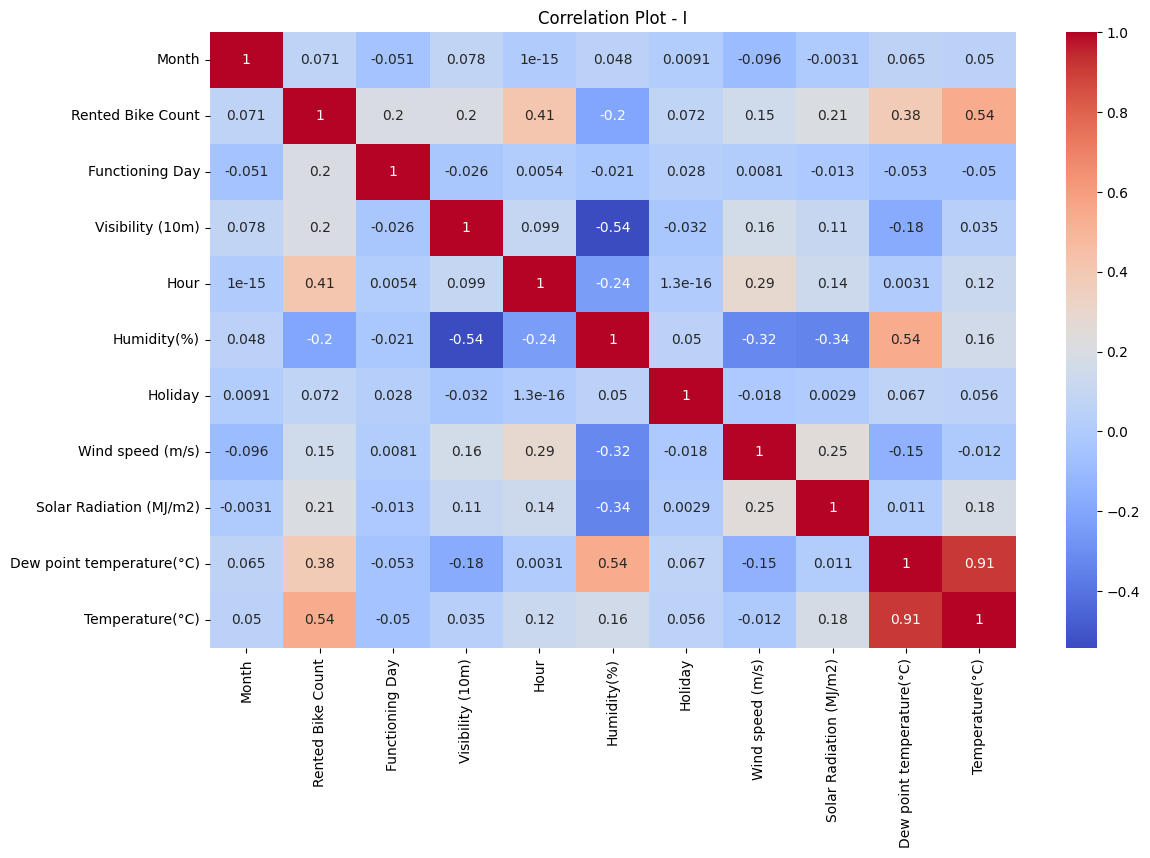

In [453]:
plt.figure(figsize=(13,8))
sns.heatmap(corr_df_1.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Plot - I')
plt.show()

In [454]:
# Creating another list of Columns

In [455]:
corr_df_list_2 = list(set(bike_share_demand_df.describe().columns)-{'Rainfall(mm)','Snowfall (cm)','Functioning Day','Humidity(%)','Month', 'Holiday','Wind speed (m/s)','Dew point temperature(°C)','Visibility (10m)', 'Temperature(°C)','Solar Radiation (MJ/m2)','Hour'})

In [456]:
corr_df_list_2

['Friday',
 'Rented Bike Count',
 'Tuesday',
 'Winter',
 'Spring',
 'Summer',
 'Sunday',
 'Week',
 'Autumn',
 'Wednesday',
 'Monday',
 'Thursday',
 'Saturday']

In [457]:
# Creating Another DataFrame for Correlation Analysis

corr_df_2 = bike_share_demand_df[corr_df_list_2]

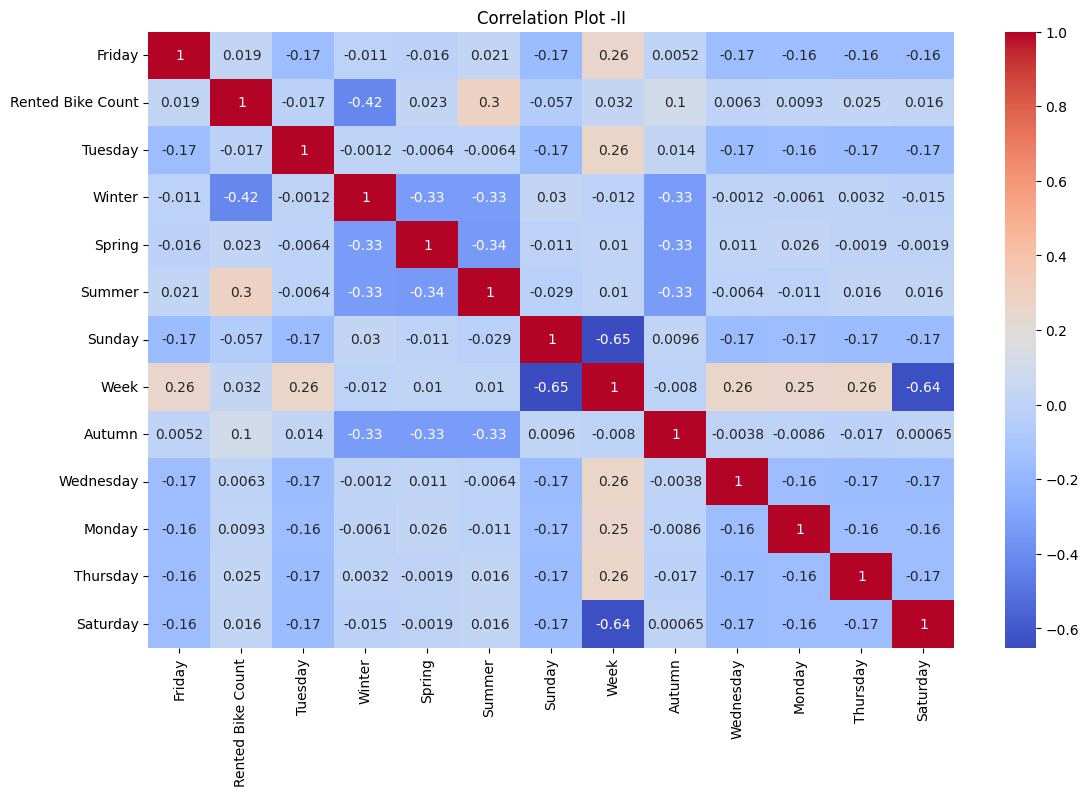

In [458]:
plt.figure(figsize=(13,8))
sns.heatmap(corr_df_2.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Plot -II')
plt.show()



### --> Summary of Correlation Analysis

*   I have created two Correlation plot because there were two many features in the dataframe So, I can understand the relationship betwen them efficiently.


#### Correlation-Plot-I:


1.   There is a high correlation between Dew Point Temperature and Temperature. One of these columns should be removed to avoid multicollinearity.
2.   Temperature shows a high positive correlation with Rental Bike count, indicating that as the Temperature increases, the Rental Bike count also increases.

1.   Humidity exhibits a negative correlation with Rental Bike count, suggesting that as Humidity increases, the Rental Bike count decreases.

#### Correlation Plot -II:


1.   Winter shows a negative correlation with Rental Bike count, indicating that during the Winter season, the usage of rental bikes decreases
2.   Summer shows a positive correlation with Rental Bike count, illustrating that in the Summer season, the usage of rental bikes increases.

1.  Sunday shows a negative correlation with Rental Bike count, signifying that during the weekend, the usage of Rental bikes decreases.


#### By Analyzing these correlation plots, we can efficiently understand the relationships between the features and Rental Bike count, helping you identify the key factors influencing bike rentals.














.
















In [459]:
# Dropping the Dew Point Temperature

bike_share_demand_df.drop('Dew point temperature(°C)',axis=1,inplace=True)

In [460]:
bike_share_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Month                    8760 non-null   int64  
 12  Week                     8760 non-null   int64  
 13  Autumn                   8760 non-null   uint8  
 14  Spring                  

In [461]:
# Pair Plot

### Pair Plot

<Figure size 1200x500 with 0 Axes>

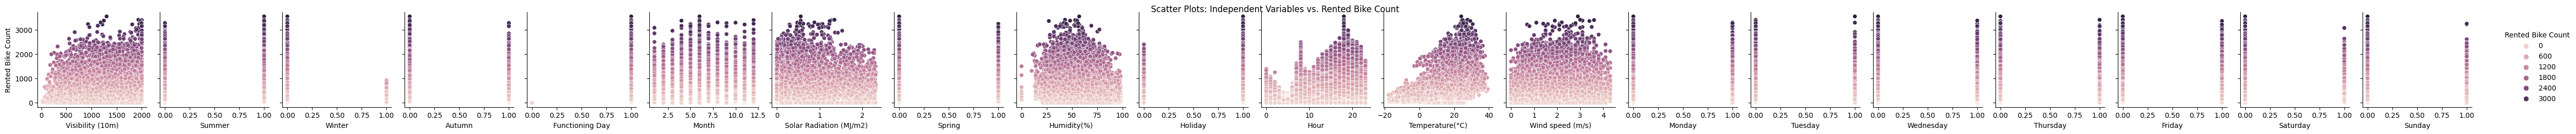

In [462]:
# Creating a Pair Plot to understand the Relation between Independent Variables and Rental Bike Count

columns_to_include = ['Visibility (10m)', 'Summer', 'Winter', 'Autumn', 'Functioning Day', 'Month',
                      'Solar Radiation (MJ/m2)', 'Spring', 'Humidity(%)', 'Holiday', 'Hour',
                      'Temperature(°C)','Wind speed (m/s)','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Create the pair plot
plt.figure(figsize=(12,5))
sns.pairplot(bike_share_demand_df, x_vars=columns_to_include, y_vars='Rented Bike Count', kind='scatter', hue='Rented Bike Count')

# Optionally, you can customize the plot appearance
plt.suptitle('Scatter Plots: Independent Variables vs. Rented Bike Count', y=1.02)
plt.show()

### Summary Pair Plot

1.  Higher visibility is positively correlated with increased usage of Rental Bikes, indicating that better visibility leads to more people using rental bikes.
2.  Usage of Rental Bikes tends to be relatively higher during the summer season compared to other seasons, suggesting that warmer weather encourages more people to use rental bikes.

1.   The peak usage of Rental Bikes occurs at 8 AM in the morning and 6 PM in the evening. These times likely coincide with rush hours and people commuting to and from work or other activities.
2.   In contrast, during the winter season, there is a lower usage of Rental Bikes, likely due to colder temperatures and less favorable weather conditions.

1.    Rental Bike usage is higher during non-holidays, suggesting that on regular workdays or non-festive days, more people opt for rental bikes for their transportation needs.



























## Multicolinearity

Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

<b>Note:</b> I will check the multicollinearity of our dataset by using the variance inflation factor. Accepted VIF is less than 10.

In [463]:
# Creating a list of columns to store Independent variables for the purposes of Calculating VIF

idv_cols = list(set(bike_share_demand_df.columns)-{'Rented Bike Count'})

In [464]:
#Creating a function to calculate the variance inflation factor(VIF)

def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [465]:
#Calculating the VIF for remaining independent columns
calc_vif(bike_share_demand_df[idv_cols])

divide by zero encountered in double_scalars
invalid value encountered in double_scalars


Columns       VIF
0           Functioning Day  1.093565
1                    Spring       inf
2                    Summer       inf
3                    Sunday       inf
4              Rainfall(mm)       NaN
5                 Wednesday       inf
6           Temperature(°C)  4.553477
7                  Thursday       inf
8                    Friday       inf
9                     Month  1.216579
10                  Tuesday       inf
11         Visibility (10m)  1.637856
12                   Winter       inf
13                     Hour  1.182992
14              Humidity(%)  2.048746
15                  Holiday  1.029488
16         Wind speed (m/s)  1.242950
17                     Week       inf
18                   Autumn       inf
19            Snowfall (cm)       NaN
20  Solar Radiation (MJ/m2)  1.271720
21                   Monday       inf
22                 Saturday       inf

In [466]:
# Dropping those Columns where VIF > 10
bike_share_demand_df.drop(columns={'Rainfall(mm)','Snowfall (cm)','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'},axis=1,inplace=True)

In [467]:
# Creating a List of Remaining Independent Columns
idv_cols = list(set(bike_share_demand_df.columns)-{'Rented Bike Count'})

In [468]:
# Calculating VIF for remaining Independent Columns
calc_vif(bike_share_demand_df[idv_cols])

Columns        VIF
0                     Month   1.216121
1           Functioning Day   1.080621
2          Visibility (10m)   1.629738
3                    Winter  26.000539
4                    Spring  29.960845
5                      Hour   1.182936
6                    Summer  39.406676
7               Humidity(%)   2.044301
8                   Holiday   1.022356
9          Wind speed (m/s)   1.236681
10                     Week   1.003042
11                   Autumn  31.290719
12  Solar Radiation (MJ/m2)   1.271214
13          Temperature(°C)   4.532265

#### We have seen that previoously Winter season has negative correlation with Rental Bike Count and here we can see that VIF >10 so we will emove that column

In [469]:
# Dropping those Columns where VIF >10

bike_share_demand_df.drop(columns={'Winter'},axis=1,inplace=True)

In [470]:
# Again Creating the List of Remainning Independent Columns

idv_cols = list(set(bike_share_demand_df.columns)-{'Rented Bike Count'})

In [471]:
# Calculating VIF for remaining Independent Columns

calc_vif(bike_share_demand_df[idv_cols])

Columns        VIF
0                     Month   5.442188
1           Functioning Day  22.082638
2          Visibility (10m)   7.917045
3                    Spring   4.020039
4                      Hour   4.304748
5                    Summer   9.386335
6               Humidity(%)  12.249339
7                   Holiday  17.373021
8          Wind speed (m/s)   4.888039
9                      Week   3.395106
10                   Autumn   4.938197
11  Solar Radiation (MJ/m2)   1.673699
12          Temperature(°C)   9.793335

#### We can see that Functioning day and Holiday has VIF > 10 so we will drop that column

In [472]:
# Dropping the Column where VIF>10
bike_share_demand_df.drop(columns={'Functioning Day','Holiday'},axis=1,inplace=True)

In [473]:
# Again Creating the list of Remaining Independent Columns
idv_cols = list(set(bike_share_demand_df.columns)-{'Rented Bike Count'})

In [474]:
# Calculating VIF for remaining Independent Columns

calc_vif(bike_share_demand_df[idv_cols])

Columns       VIF
0                     Month  5.275292
1          Visibility (10m)  5.690645
2                    Spring  3.903586
3                      Hour  4.096552
4                    Summer  9.315181
5               Humidity(%)  6.776503
6          Wind speed (m/s)  4.740216
7                      Week  3.318928
8                    Autumn  4.839704
9   Solar Radiation (MJ/m2)  1.613979
10          Temperature(°C)  9.670807

#### Now we don't have any column where VIF >10 so This will we our Final Independent Variables

### <b>Obtaining correlation between independent and dependent variables:</b>
We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

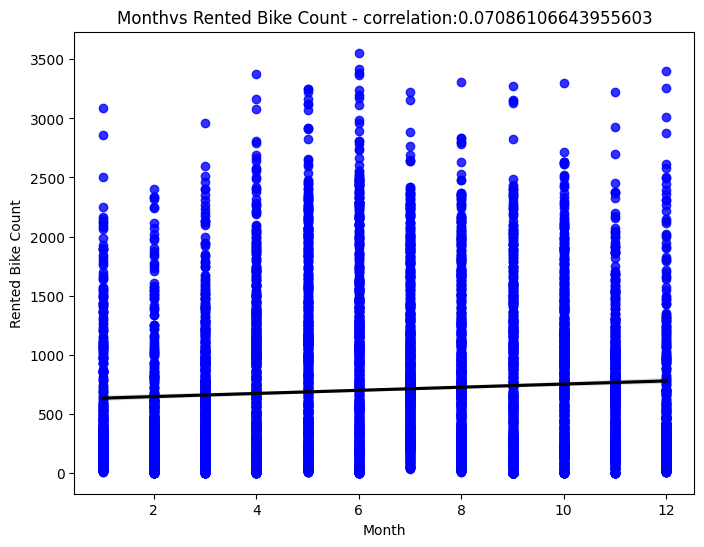

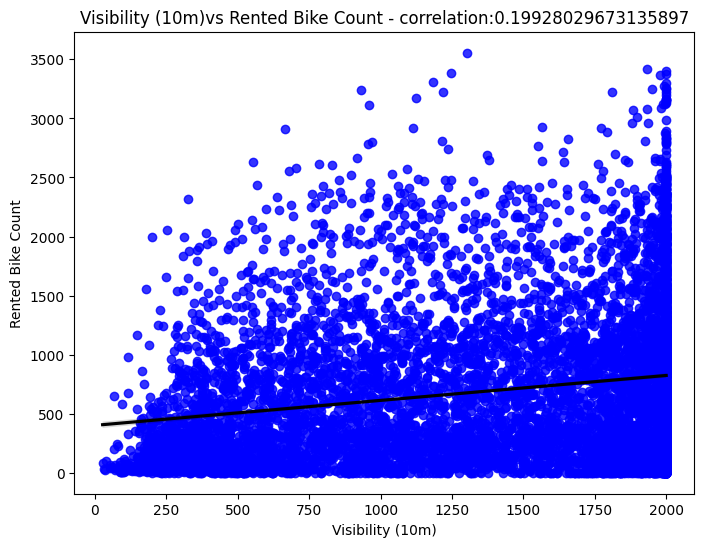

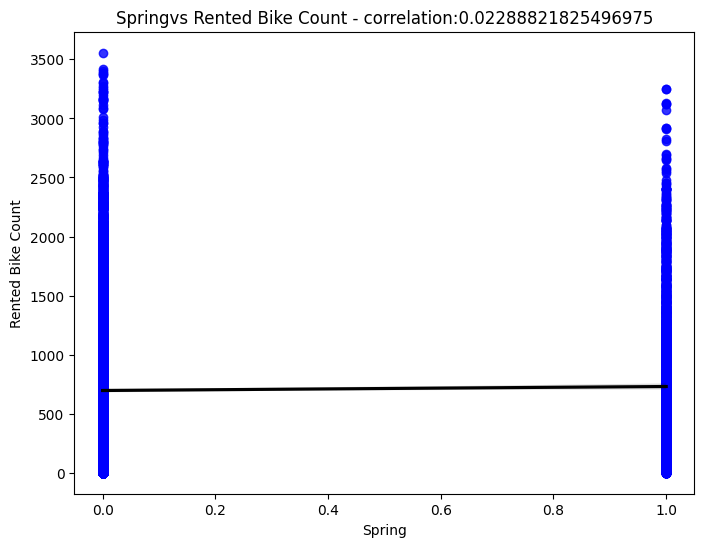

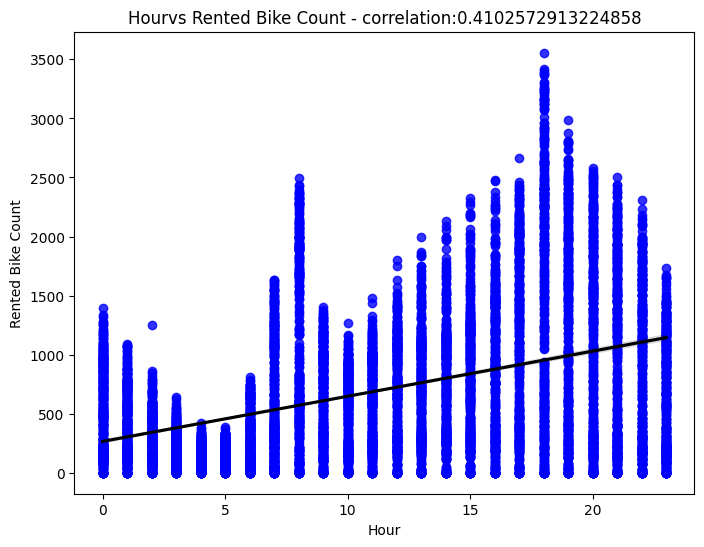

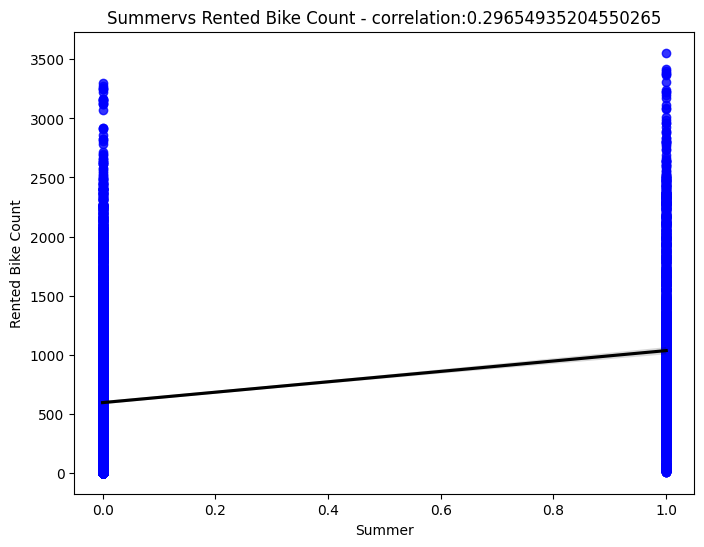

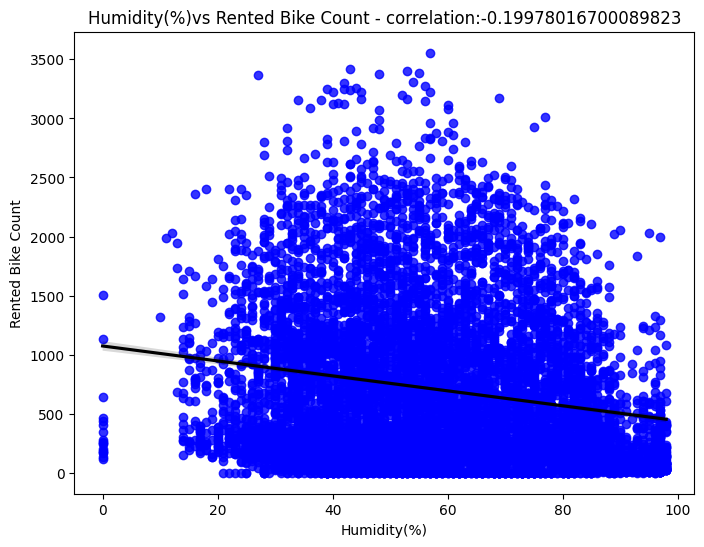

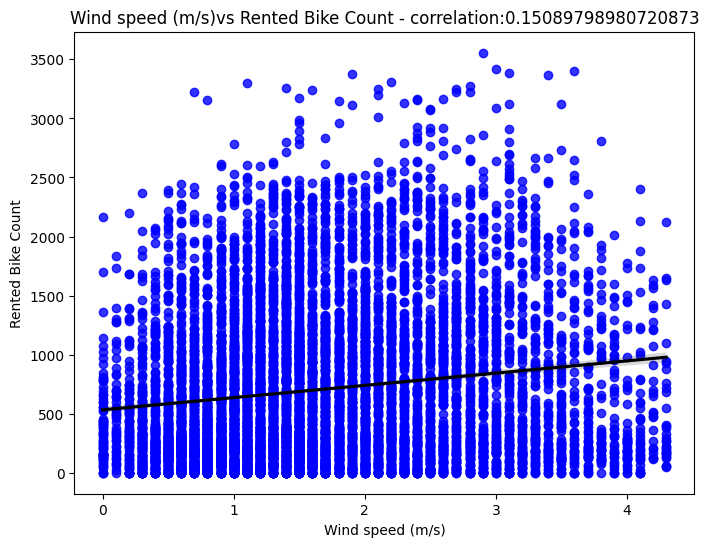

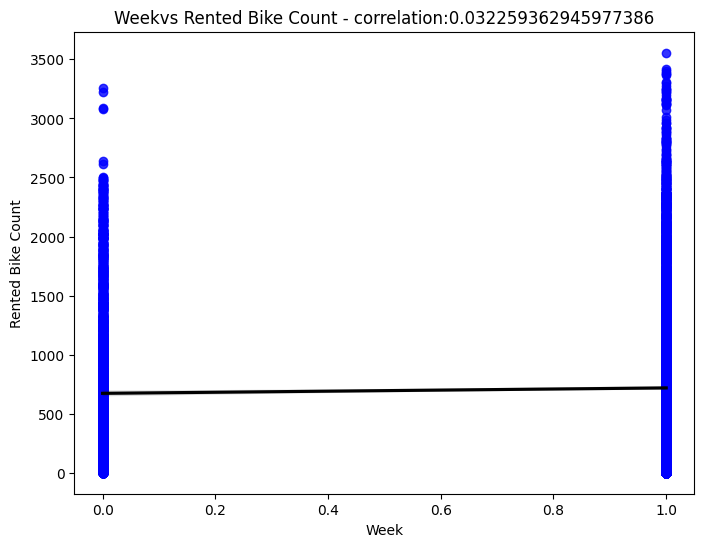

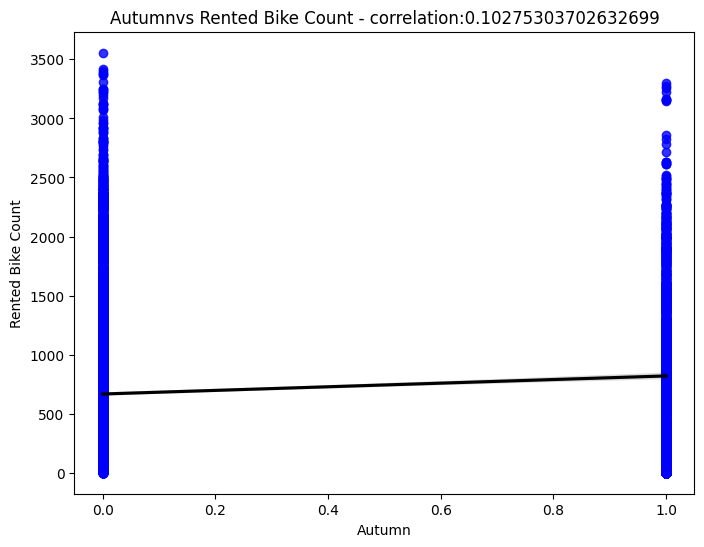

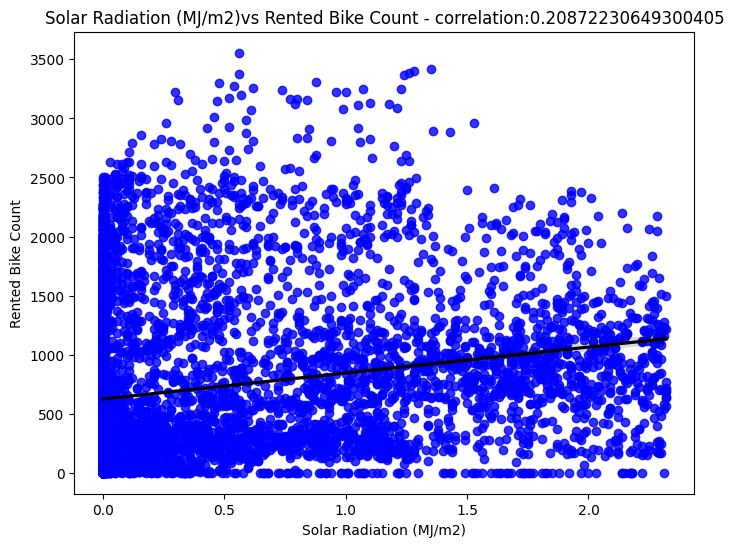

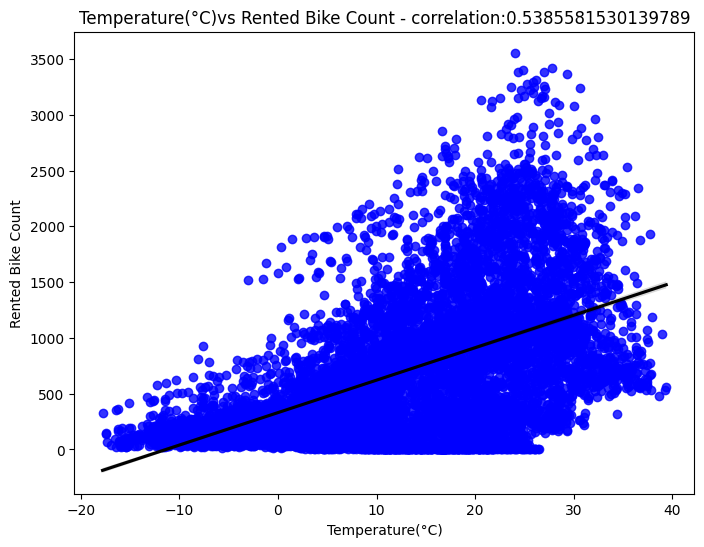

In [475]:
#printing the regression plot for all the numerical features
for col in idv_cols:
  fig,ax=plt.subplots(figsize=(8,6))
  sns.regplot(x=bike_share_demand_df[col],y=bike_share_demand_df['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})
  corr=bike_share_demand_df[col].corr(bike_share_demand_df['Rented Bike Count'])
  ax.set_title(col+'vs Rented Bike Count - correlation:'+str(corr))

## ***5. Data Transformation***

#### Data transformation involves modifying the original dataset to improve its properties,by normalizing or scaling the features It is essential for preparing data before applying machine learning algorithms to ensure better model performance and meaningful insights.

In [476]:
#Creating the dataframe for independent and dependent variables

X = bike_share_demand_df.drop(columns={'Rented Bike Count'},axis=1)
Y = bike_share_demand_df['Rented Bike Count']

In [477]:
# Inependent Variable Dataframe

X.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Month  Week  Autumn  Spring  Summer  
0                      0.0      1     1       0       0       0  
1                      0.0      1     1       0       0       0  
2                      0.0      1     1       0       0       0  
3                      0.0      1     1       0       0       0  
4                      0.0      1     1       0       0       0

In [478]:
# Dependent Variable

Y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [479]:
# Importinng these libraries for Creating Probability Plot

import scipy.stats as stat
import pylab

In [480]:
# Creating a function to check whether feature is guassian or normal distributed

def plot_data(final_df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    final_df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(final_df[feature],dist='norm',plot=pylab)
    plt.show()

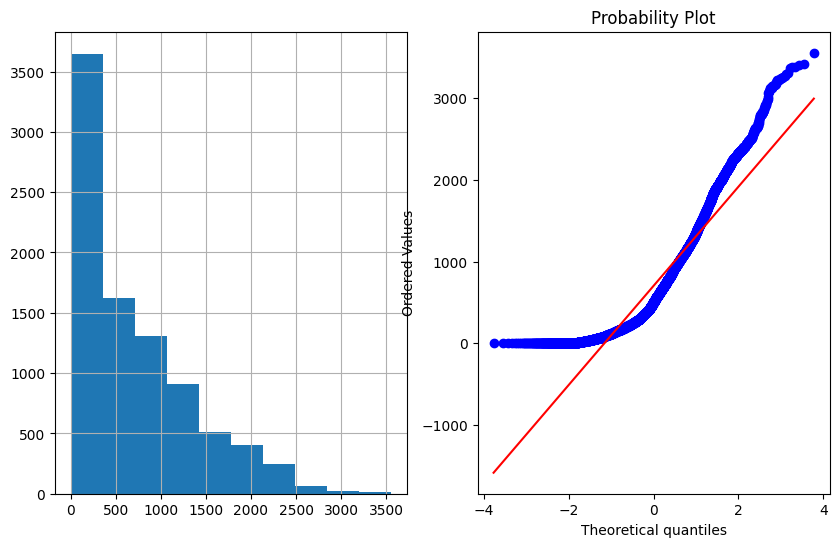

In [481]:
plot_data(bike_share_demand_df,'Rented Bike Count')

#### --> Dependent variable is not normally distributed So, We will need to apply Transformation on Dependent Variable

In [482]:
#Applying square root transformation on the dependent variable

Y = np.sqrt(Y)

In [483]:
#Creating a dataframe with values of Y for visualisation purposes

vis_Y = Y.reset_index()

In [484]:
vis_Y

index  Rented Bike Count
0         0          15.937377
1         1          14.282857
2         2          13.152946
3         3          10.344080
4         4           8.831761
...     ...                ...
8755   8755          31.670175
8756   8756          27.640550
8757   8757          26.343880
8758   8758          26.683328
8759   8759          24.166092

[8760 rows x 2 columns]

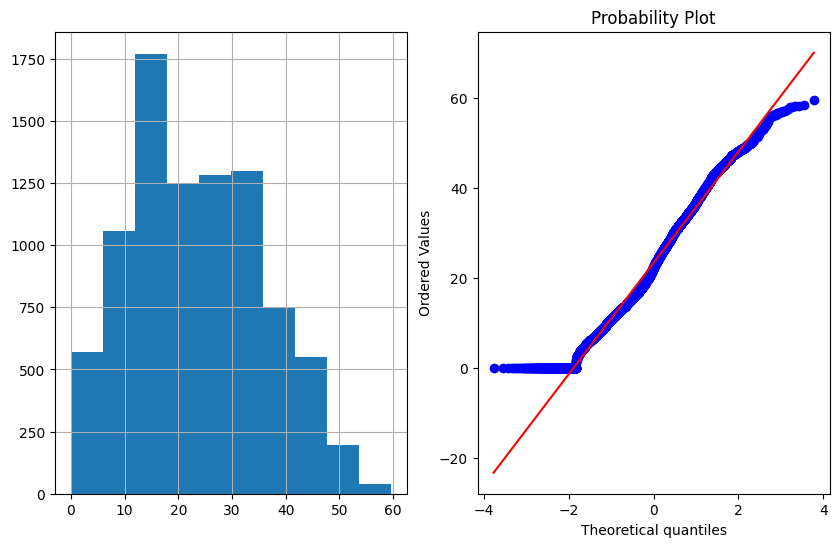

In [485]:
plot_data(vis_Y,'Rented Bike Count')

### After applying the Square-Root transformation to our dependent variable, we have successfully achieved a distribution that closely resembles a normal distribution.


## ***6. Train and Test Split***

#### Train-test split is a common data preparation step in machine learning, where the original dataset is divided into two separate subsets: the training set, used to train the model, and the test set, used to evaluate its performance.

In [486]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [487]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [488]:
#Shape of the train set of the independent values
X_train.shape

(7008, 11)

In [489]:
#Shape of the Test set of the independent values
X_test.shape

(1752, 11)

## ***7. Data Scaling***

#### Data scaling is a crucial preprocessing step that aims to standardize or normalize the features of a dataset.It involves transforming the data in a way that all features have comparable scales or fall within a similar range.

#### I have used the Standardization method for Data Scaling.

#### Standardization : This method transforms the data such that it has a mean of 0 and a standard deviation of 1. The formula for standardization is:
#### X_scaled = (X - mean) / standard_deviation

In [490]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [491]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [492]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 0.50774916, -0.38874606,  0.18996015, ..., -0.58042598,
        -0.57866842, -0.57910781],
       [ 0.9408263 ,  1.29850393, -0.05608294, ..., -0.58042598,
        -0.57866842,  1.72679419],
       [-0.06968702,  1.42379477, -0.05608294, ..., -0.58042598,
        -0.57866842,  1.72679419],
       ...,
       [-0.06968702,  1.05627497, -0.05608294, ..., -0.58042598,
        -0.57866842,  1.72679419],
       [-1.65763652, -0.38039334,  0.0423343 , ..., -0.58042598,
         1.72810536, -0.57910781],
       [ 1.22954439, -0.48062601,  1.22334111, ..., -0.58042598,
         1.72810536, -0.57910781]])

## ***8. ML Model Implementation***

## ML Model - 1 - Linear Regression
####  Linear regression is a supervised machine learning technique used for continuous output prediction. It establishes a linear relationship between an input variable (x) and the dependent variable (y). By finding the best-fit line that minimizes the difference between actual and predicted values,

In [493]:
# Training the Linear Regression Model

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [494]:
#Checking the score of the linear regression model

lr_model.score(X_train,Y_train)

0.4802543851475184

In [495]:
#Checking the coefficient values of the linear regression model

lr_model.coef_

array([ 3.48407325,  4.3793851 , -3.23623619,  0.02092015,  0.2234335 ,
        0.16839541,  0.46683309,  0.44225724,  2.60442362,  2.56213636,
        3.29245809])

In [496]:
# Checking the intercept value of linear Regression Model
lr_model.intercept_

23.55011559839751

In [497]:
#Predicting the value of the dependent variable for train and test dataset

Y_train_pred_lr = lr_model.predict(X_train)
Y_test_pred_lr = lr_model.predict(X_test)

In [498]:
#Creating a function to plot the comparison between actual values and predictions on Train Dataset

def plot_comparison_train(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("The comparison of actual values and predictions obtained by "+model)
   plt.plot(np.array((Y_train)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

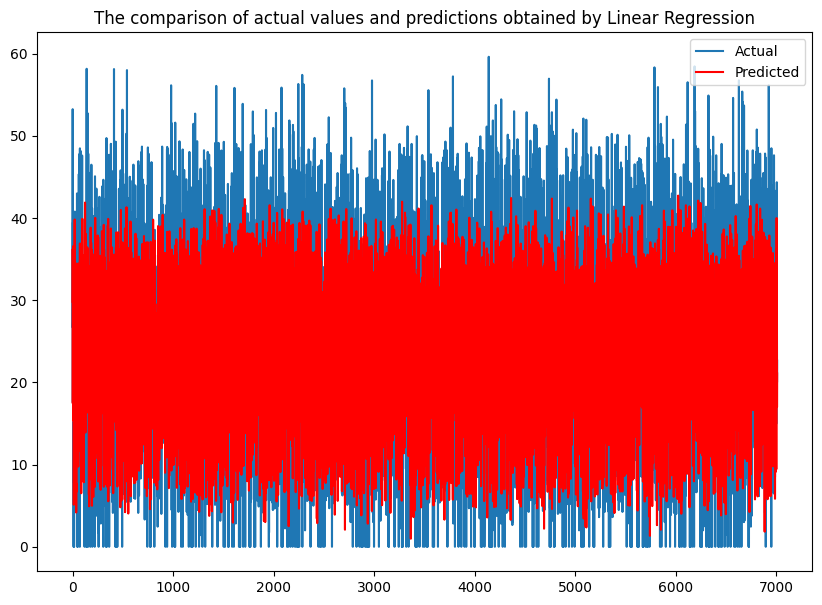

In [499]:
# First checking the model prediction on Train dataset
plot_comparison_train(Y_train_pred_lr,'Linear Regression')

In [500]:
#Creating a function to plot the comparison between actual values and predictions on test Dataset

def plot_comparison_test(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("The comparison of actual values and predictions obtained by "+model)
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

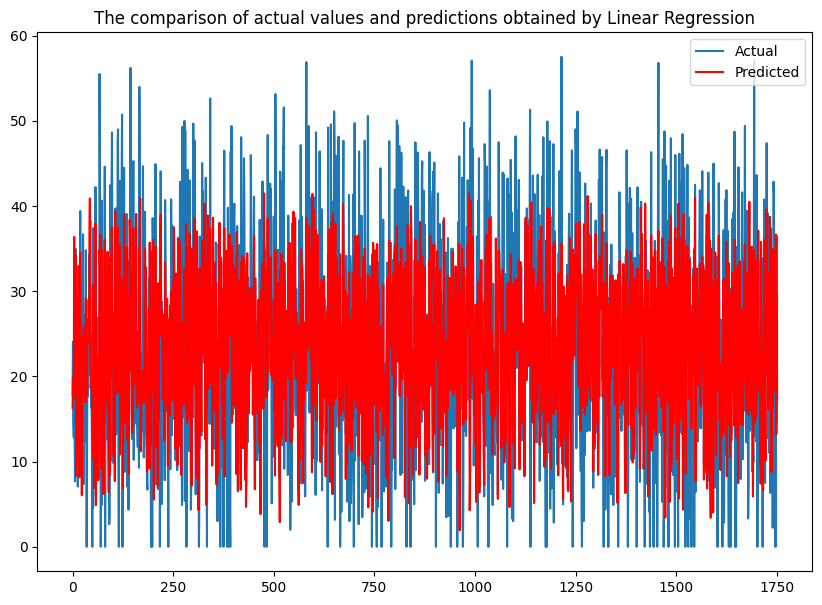

In [501]:
# Checking the model prediction on Test Dataset
plot_comparison_test(Y_test_pred_lr,'Linear Regression')

In [502]:
#Creating a function to calculate and display the evaluation metrics for the model on Train Dataset

def eval_metrics_train(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_train,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2_test = r2_score(Y_train,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)

  a_r2_test = 1-(1-r2_score(Y_train,y_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [503]:
# Calling the function for evalution metrics on Train Dataset

eval_metrics_train(Y_train_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 80.21396372575731
RMSE : 8.956224859043978
R2 : 0.4802543851475184
Adjusted R2 : 0.47943717506127237


In [504]:
#Creating a function to calculate and display the evaluation metrics for the model on Test Dataset

def eval_metrics_test(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2_test = r2_score(Y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)

  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [505]:
# Calling the function for Calculating evaluation metrics on Test Dataset

eval_metrics_test(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 86.41770918948937
RMSE : 9.296112584811427
R2 : 0.4512682519838901
Adjusted R2 : 0.4477992581745929


## ML Model - 2 - Ridge and Lasso Regression

### 1. Ridge Regression
#### Ridge Regression is a regularization technique known as L2 Regularization used in linear regression to prevent overfitting. It adds a penalty term to the loss function, which constrains the model's coefficients, making them less sensitive to variations in the input data. By controlling the complexity of the model, Ridge Regression improves its generalization performance and stability.

In [506]:
#Training the ridge regression model using GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [507]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV

print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')
print(f'\nUsing {ridge_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 20}

Using {'alpha': 20} as the value for aplha gives us a negative mean squared error of: -80.48397454361061


In [508]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value

ridge_model=Ridge(alpha=20).fit(X_train,Y_train)


In [509]:
#Predicting values of the independent variable on the test set

Y_train_pred_ridge = ridge_model.predict(X_train)
Y_test_pred_ridge = ridge_model.predict(X_test)

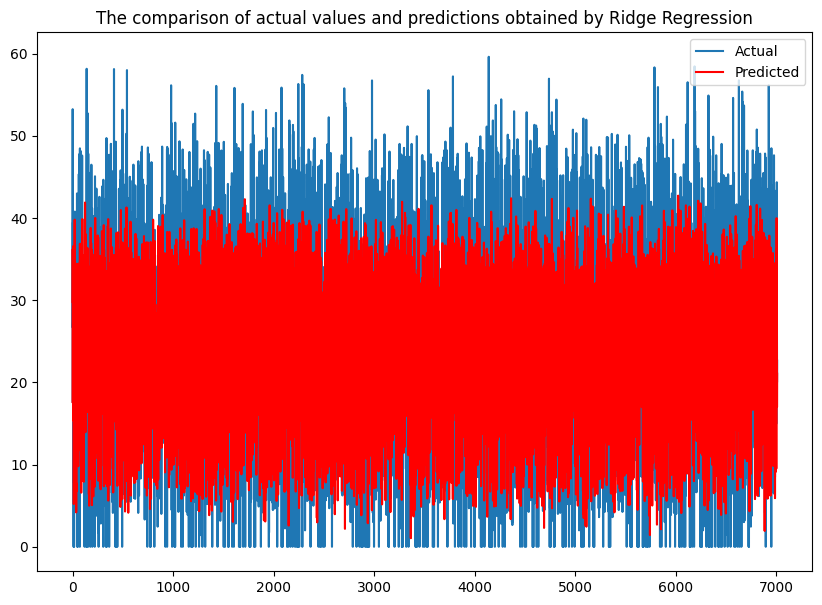

In [510]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression for Train Datset

plot_comparison_train(Y_train_pred_ridge,'Ridge Regression')

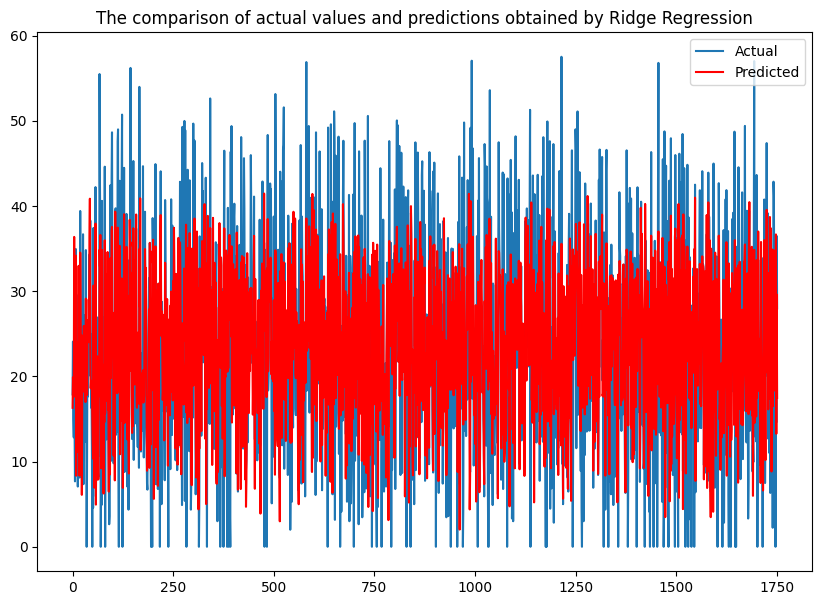

In [511]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression for Test Dataset

plot_comparison_test(Y_test_pred_ridge,'Ridge Regression')



In [512]:
# Calling the function for Evaluation Metrics for Ridge Regression on Test Dataset

eval_metrics_test(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 86.41721400795328
RMSE : 9.296085950977071
R2 : 0.45127139626800084
Adjusted R2 : 0.4478024223363617


### 2. Lasso Regression
#### Lasso Regression is another regularization technique known as L2 Regularization used in linear regression to prevent overfitting. Similar to Ridge Regression, it adds a penalty term to the loss function, but Lasso Regression uses the absolute values of the coefficients, resulting in sparsity.
#### It can effectively perform feature selection by setting some coefficients to zero, thus producing a simpler and more interpretable model.

In [513]:
#Creating a Lasso regression model using GridSearchCV

lasso = Lasso()
parameters = {'alpha': [0.7,1,10,20,40,80,100,300,700,1000]}
lasso_model_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.7, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [514]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV

print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {lasso_model_grid.best_params_}')
print(f'\nUsing {lasso_model_grid.best_params_} as the value for alpha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 0.7}

Using {'alpha': 0.7} as the value for alpha gives us a negative mean squared error of: -84.82287671210214


In [515]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value

lasso_model=Lasso(alpha=0.7).fit(X_train,Y_train)

In [516]:
#Predicting values of the independent variable on the test set

Y_train_pred_lasso = lasso_model.predict(X_train)
Y_test_pred_lasso = lasso_model.predict(X_test)

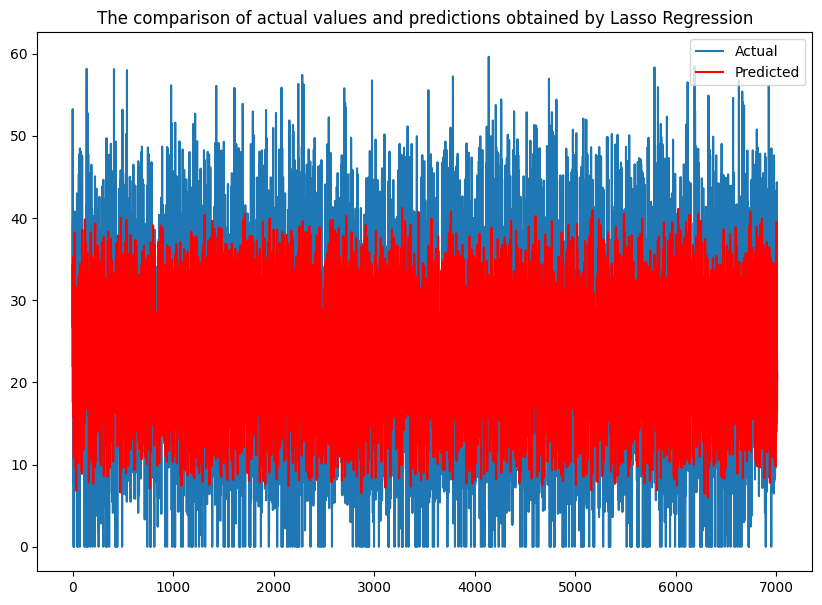

In [517]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression on Train Dataset

plot_comparison_train(Y_train_pred_lasso,'Lasso Regression')

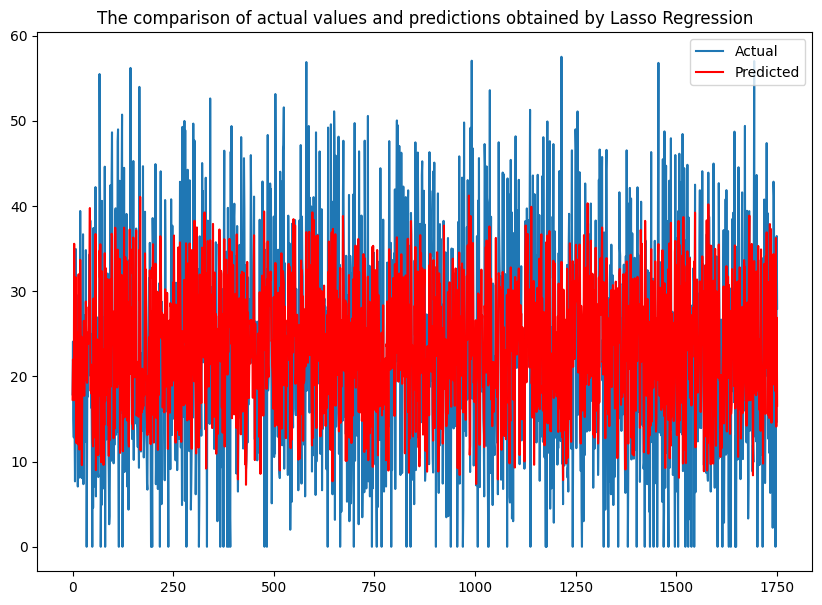

In [518]:
# Plotting the comparison between actual and predicted values obtained by Lasso Regression on Train Dataset

plot_comparison_test(Y_test_pred_lasso,'Lasso Regression')

In [519]:
#Calling the function -: Evaluation metrics for Lasso Regression on Test Dataset

eval_metrics_test(Y_test_pred_lasso,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 90.70896854954262
RMSE : 9.524125605510598
R2 : 0.42401978321611455
Adjusted R2 : 0.4203785289720785


## ML Model - 3 - Random Forest Regression

#### Random Forest Regression is an ensemble machine learning technique that combines multiple decision tree models to perform regression tasks. It works by averaging the predictions of individual trees, resulting in a more robust and accurate prediction. It is particularly effective in handling nonlinear relationships and handling high-dimensional datasets while reducing the risk of overfitting.

In [520]:
#Creating a Random Forest Regression model using GridSearchCV

rand_forest = RandomForestRegressor()


parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)],
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

rf_model_grid = GridSearchCV(rand_forest,parameters,scoring='r2',cv=5)
rf_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [521]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV

print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20}

Using {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.7650778988744186


In [522]:
#Fitting Random Forest model on the dataset with appropriate paramter values

rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,Y_train)

In [523]:
#Predicting values of the independent variable on the test set

Y_train_pred_rf = rf_model.predict(X_train)
Y_test_pred_rf = rf_model.predict(X_test)

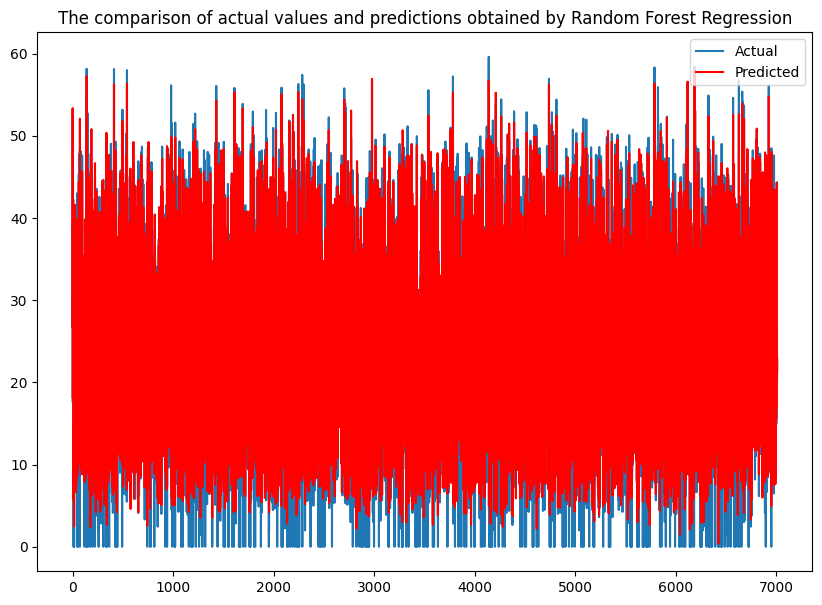

In [524]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression on Train Dataset

plot_comparison_train(Y_train_pred_rf,'Random Forest Regression')

In [525]:
# Calling Function -:Evaluation metrics for Random Forest Regression on Train Dataset

eval_metrics_train(Y_train_pred_rf ,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 9.939551115615211
RMSE : 3.1527053645425243
R2 : 0.9355967731054258
Adjusted R2 : 0.9354955101700569


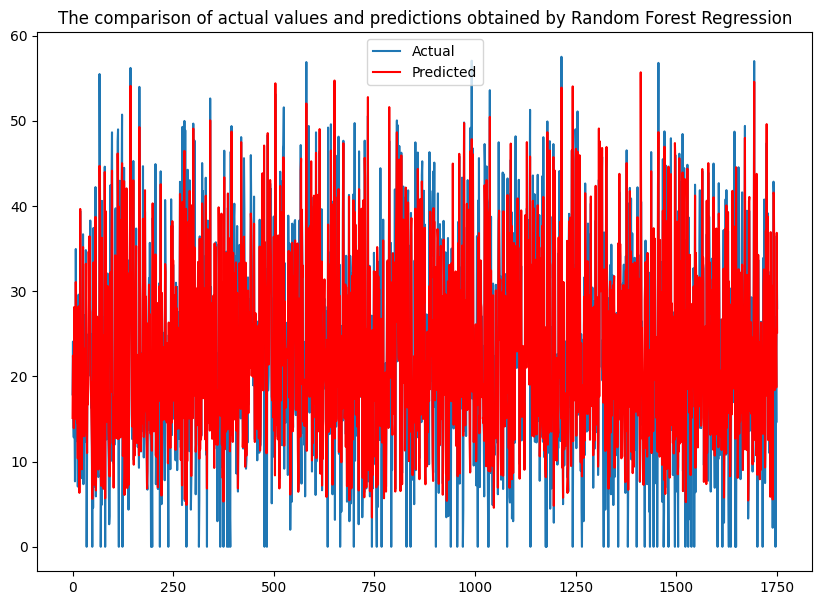

In [526]:
# Plotting the comparison between actual and predicted values obtained by Random Forest Regression on Test Dataset

plot_comparison_test(Y_test_pred_rf,'Random Forest Regression')

In [527]:
# Calling Function -:Evaluation metrics for Random Forest Regression on Test Dataset

eval_metrics_test(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 42.78954977661659
RMSE : 6.541372163133404
R2 : 0.7282966111233027
Adjusted R2 : 0.7265789460212086


## ***9. Model Explainability***

#### Model explainability refers to the ability to interpret and understand how a machine learning model arrives at its predictions or decisions. It involves providing clear and intuitive explanations of the model's internal workings, feature importance, and the factors influencing its output, which is crucial for building trust, identifying biases, and gaining insights into the model's behavior.

In [528]:
#Installing the shap library

!pip install shap

In [529]:
#Initialising javascript for visualisation of SHAP

import shap

In [530]:
#Creating a function to plot the shap summary plot

def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

 99%|===================| 6972/7008 [01:03<00:00]       No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


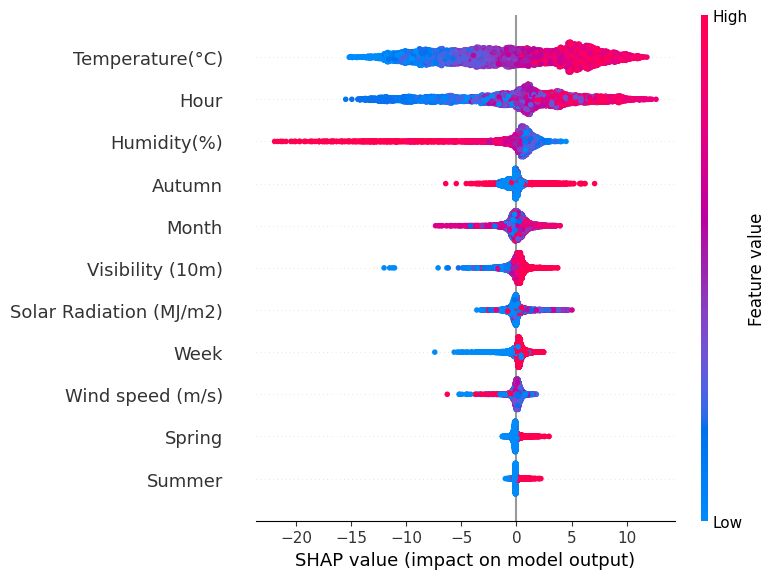

In [531]:
#Plotting shap summary plot for Random forest regression model

explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **10. Conclusion**

## 1. EDA Insights -:


*    Highest number of Bike rented in the evening time at 18:00 i.e 6:00 PM or in the moring time at 8:00-9:00 which is essentially office time.
*   The Seasonal variations in bike rentals, showcasing that the summer season experiences the highest bike rental activity, while the winter season sees the lowest usage.

*   The Majority of the bikes are rented on non-holiday or regular days. It suggests that rental bikes are being utilized more frequently for everyday transportation.
*   Most bikes rented between April to August while decrease in December, January and Feburary.


*   The temperature increases Rented bike count also increases and the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.

*    The bikes are rented when there is no rainfall which implies that as the rainfall increases Bike rental fastly decreases.

*   Most of the bikes are rented when there is no snowfall at all which implies that as the rainfall increases Bike rental fastly decreases.
*   The demand for rental bikes during specific hours from Monday to Friday. At 8:00 AM and 6:00 PM, there is a significant peak in rental bike usage, indicating that these hours experience the highest demand on weekdays.

*    Most of the bikes are rented when there is high Visibility which implies that as the Visibility increases Bike rental increases.
   

*   Majority of the bikes are rented for a humidity percentage range of 30 to 70.

## 2. ML Models Results -:

  * Random Forest Regression is the best performing model with an R2 score of
   0.7239.
  *  Lasso Regression (L1 regularization), exhibited comparatively weaker performance, achieving an R2 score of 0.4240.

  *   Ridge Regression (L2 regularization) comes up with an R2 score of  0.4512.
  *   Linear Regression Model comes up with an r2 score of  0.48025.


  * Actual vs Prediction visualisation is done for all the 4 models on Train as well as Test data.
  * Random forest the best perfoming model have also been explained with the help of SHAP library.
  * Temperature and Hour are the two most important factors according to all the models.

## 3. Challenge Faced during this project -:

*   Removing Multi-collininearity
*   Feature Selection
*   Hyperparameter Tuning



















### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***